In [2]:
from benchmarks.scripts.car_racing import *
from benchmarks.scripts.cliffwalking import *
from benchmarks.scripts.common import *
from benchmarks.scripts.grid_world import *
from benchmarks.scripts.self_driving_car import *
from benchmarks.scripts.sidewalk import *
from benchmarks.scripts.taxi import *
from benchmarks.scripts.water_tank import *
import matplotlib.pyplot as plt
import tikzplotlib

In [3]:
scalars = dict()
scalars[Benchmarks.CAR_RACING] = dict()
scalars[Benchmarks.CAR_RACING][Configurations.NO_SHIELD] = get_car_racing_no_shield_scalars()
scalars[Benchmarks.CAR_RACING][Configurations.SAFE_PADDING] = get_car_racing_safe_padding_scalars()
scalars[Benchmarks.CAR_RACING][Configurations.DYNAMIC_SHIELD] = get_car_racing_dynamic_shield_scalars()

scalars[Benchmarks.CLIFFWALKING] = {
    Configurations.NO_SHIELD: get_cliffwalking_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_cliffwalking_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_cliffwalking_dynamic_shield_scalars()
}

scalars[Benchmarks.GRID_WORLD] = {
    Configurations.NO_SHIELD: get_grid_world_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_grid_world_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_grid_world_dynamic_shield_scalars()
}

scalars[Benchmarks.SELF_DRIVING_CAR] = {
    Configurations.NO_SHIELD: get_self_driving_car_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_self_driving_car_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_self_driving_car_dynamic_shield_scalars()
}

scalars[Benchmarks.SIDEWALK] = {
    Configurations.NO_SHIELD: get_sidewalk_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_sidewalk_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_sidewalk_dynamic_shield_scalars()
}

scalars[Benchmarks.TAXI] = {
    Configurations.NO_SHIELD: get_taxi_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_taxi_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_taxi_dynamic_shield_scalars()
}

scalars[Benchmarks.WATER_TANK] = {
    Configurations.NO_SHIELD: get_water_tank_no_shield_scalars(),
    Configurations.SAFE_PADDING: get_water_tank_safe_padding_scalars(),
    Configurations.DYNAMIC_SHIELD: get_water_tank_dynamic_shield_scalars()
}

In [89]:
BenchmarkToLaTeX = {
    Benchmarks.WATER_TANK: '\WaterTank{}',
    Benchmarks.GRID_WORLD: '\GridWorld{}',
    Benchmarks.CLIFFWALKING: '\CliffWalking{}',
    Benchmarks.TAXI: '\Taxi{}',
    Benchmarks.SELF_DRIVING_CAR: '\SelfDrivingCar{}',
    Benchmarks.SIDEWALK: '\SideWalk{}',
    Benchmarks.CAR_RACING: '\CarRacing{}',
}

ConfigurationToLaTeX = {
    Configurations.NO_SHIELD: r'\NoShield{}',
    Configurations.SAFE_PADDING: '\SafePadding{}',
    Configurations.DYNAMIC_SHIELD: '\DynamicShielding{}',
}

In [4]:
crash_data_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        print(len(scalars[benchmark][configuration]))
        crash_data_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar[CRASH_KEYS[benchmark]][-1], scalars[benchmark][configuration].values()))[-30:]


30
34
34
30
30
42
30
30
30
30
30
30
30
30
36
60
30
30
30
30
31


In [5]:
crash_data_frame

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
0,129.0,96.0,21.0,1081.0,1211.0,533.0,7076.0,6585.0,6005.0,6233,...,6648,218.0,134.0,159.0,12648.0,1596.0,48.0,1873.0,2052.0,178.0
1,30.0,90.0,52.0,1297.0,941.0,548.0,6374.0,7507.0,6616.0,7055,...,5992,120.0,593.0,200.0,3617.0,400.0,29.0,1921.0,1837.0,224.0
2,104.0,63.0,48.0,623.0,403.0,370.0,6598.0,6939.0,4930.0,6403,...,7124,343.0,282.0,290.0,13152.0,2727.0,84.0,1869.0,1843.0,175.0
3,123.0,38.0,5.0,2259.0,2857.0,610.0,6631.0,6979.0,5801.0,7152,...,6133,168.0,710.0,341.0,12841.0,4655.0,33.0,1747.0,1907.0,185.0
4,101.0,65.0,10.0,796.0,577.0,748.0,6870.0,7476.0,5379.0,6155,...,5197,1545.0,919.0,293.0,1584.0,969.0,18.0,2052.0,1843.0,143.0
5,217.0,105.0,4.0,426.0,367.0,190.0,6378.0,6589.0,4234.0,5606,...,5979,57.0,440.0,860.0,13257.0,1808.0,14.0,1869.0,1976.0,186.0
6,186.0,128.0,24.0,663.0,2677.0,539.0,6432.0,7448.0,7484.0,7427,...,5452,647.0,1176.0,104.0,12914.0,1953.0,31.0,1858.0,1842.0,167.0
7,62.0,83.0,237.0,1108.0,1333.0,220.0,5872.0,8279.0,4190.0,5513,...,5408,154.0,1552.0,341.0,12621.0,1902.0,38.0,1812.0,1993.0,156.0
8,30.0,716.0,4.0,700.0,4829.0,203.0,6503.0,7733.0,4967.0,7483,...,5177,309.0,1047.0,1466.0,12946.0,2148.0,49.0,2036.0,1809.0,124.0
9,97.0,0.0,73.0,2211.0,1515.0,610.0,6937.0,7878.0,5601.0,7192,...,5658,67.0,178.0,876.0,788.0,561.0,44.0,1842.0,1898.0,172.0


In [6]:
crash_data_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,180.133333,141.166667,41.733333,1493.200000,1528.666667,478.20000,6996.400000,7322.233333,5623.433333,6403.066667,...,5662.400000,373.600000,427.933333,273.366667,8723.133333,2057.333333,37.766667,1883.666667,1892.400000,177.133333
std,136.849208,132.759851,66.788360,1523.119109,1058.675827,155.08516,1510.042785,1399.385966,1256.438664,678.950404,...,582.880871,386.105006,399.938696,314.050565,5593.192344,1406.017029,19.794955,83.015717,79.932989,28.042742
min,30.000000,0.000000,1.000000,346.000000,365.000000,190.00000,5872.000000,5997.000000,4190.000000,5429.000000,...,4667.000000,57.000000,45.000000,43.000000,541.000000,400.000000,8.000000,1747.000000,1783.000000,121.000000
25%,101.750000,82.250000,6.000000,672.250000,637.250000,373.25000,6426.000000,6589.250000,4966.250000,5874.250000,...,5221.000000,182.500000,134.750000,104.250000,1564.500000,970.250000,28.000000,1825.500000,1839.000000,160.000000
50%,153.500000,96.500000,16.000000,1112.000000,1331.000000,525.50000,6663.000000,6910.500000,5354.500000,6315.000000,...,5622.500000,294.000000,257.500000,150.000000,12634.500000,1651.500000,33.000000,1859.000000,1860.500000,173.500000
75%,212.000000,196.000000,42.750000,1718.250000,2244.750000,607.50000,6926.000000,7477.500000,5768.000000,7009.500000,...,5988.750000,398.000000,556.000000,292.250000,12984.250000,2608.500000,43.750000,1945.000000,1922.750000,195.500000
max,727.000000,716.000000,277.000000,8528.000000,4829.000000,748.00000,14118.000000,12358.000000,10370.000000,7483.000000,...,7124.000000,1845.000000,1552.000000,1466.000000,13870.000000,4681.000000,104.000000,2052.000000,2103.000000,231.000000


In [7]:
import numpy as np

safe_rate_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        safe_rate_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar['eval/safe_rate'][np.argmax(scalar['eval/success_rate'])],
                scalars[benchmark][configuration].values()))[-30:]

In [8]:
safe_rate_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.0,30.0,30.0,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.0,...,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,0.804444,0.851111,0.728889,1.0,...,1.0,0.933333,0.886667,0.886667,0.566667,0.667778,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.262720,0.236146,0.292791,0.0,...,0.0,0.142232,0.250149,0.208001,0.504007,0.477901,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.033333,0.000000,1.0,...,1.0,0.400000,0.200000,0.200000,0.000000,0.000000,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,0.866667,0.900000,0.708333,1.0,...,1.0,1.000000,1.000000,0.800000,0.000000,0.000000,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,0.900000,0.933333,0.866667,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,0.933333,0.933333,0.933333,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,0.966667,1.000000,0.966667,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


In [9]:
success_rate_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        success_rate_frame[benchmark, configuration] = list(
            map(lambda scalar: (max(scalar[SUCCESS_RATE_KEYS[benchmark]])),
                scalars[benchmark][configuration].values()))[-30:]

In [10]:
success_rate_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,...,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0
mean,1.0,1.0,1.0,0.866667,0.866667,0.866667,0.767778,0.826667,0.645556,1.0,...,1.0,0.766667,0.700000,0.526667,0.266667,0.433333,0.500000,1.0,1.0,1.0
std,0.0,0.0,0.0,0.345746,0.345746,0.345746,0.351950,0.284517,0.386901,0.0,...,0.0,0.340723,0.412729,0.450236,0.449776,0.504007,0.508548,0.0,0.0,0.0
min,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.875000,0.900000,0.316667,1.0,...,1.0,0.650000,0.300000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.900000,0.933333,0.850000,1.0,...,1.0,1.000000,1.000000,0.700000,0.000000,0.000000,0.500000,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.933333,0.933333,0.925000,1.0,...,1.0,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.0,1.0,1.0
max,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0


In [11]:
wall_time_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        wall_time_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar[WALL_TIME_KEYS[benchmark]][-1] - scalar[WALL_TIME_KEYS[benchmark]][0],
                scalars[benchmark][configuration].values()))[-30:]

In [12]:
wall_time_frame.describe()



,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7650.377913,16694.627996,12532.040809,355.178474,365.543799,839.055159,177.175052,1487.095345,4548.700775,865.554754,...,10087.176462,762.667999,1734.658177,6395.728248,336.038446,349.782634,611.869389,1860.463193,1947.086816,6080.892649
std,811.200543,576.955202,667.425560,11.816222,13.967701,148.452591,13.065200,125.033028,1667.945018,3.465104,...,707.475445,64.920758,146.830522,1460.232968,10.220445,12.066385,124.566998,59.077191,80.114996,4055.239392
min,5624.049393,15499.131437,11589.947005,337.889230,341.857290,511.579793,165.742990,1308.225568,1851.967686,859.099894,...,9001.120428,654.509822,1527.958375,4132.505198,321.417902,335.636904,483.447877,1797.187464,1887.970838,2698.263294
25%,7567.565216,16372.448451,12162.753591,345.454511,352.508560,743.868937,168.405419,1381.813000,3610.661704,863.679927,...,9635.365478,717.642271,1630.488488,5125.052301,329.845848,339.305283,530.710485,1820.961276,1902.478042,3262.718201
50%,7821.730306,16689.233053,12362.821044,353.630649,366.826362,861.613343,174.445117,1473.392987,4489.618470,865.362822,...,10006.603284,759.114100,1716.556535,6635.659473,333.567802,343.366933,582.540170,1833.597623,1916.110528,4236.293062
75%,8117.892946,17057.384827,12664.762321,362.965178,374.796067,880.264593,180.763461,1603.413123,5374.363798,867.722763,...,10522.183984,818.460324,1759.920940,7414.079591,339.720405,360.759565,665.965377,1896.659527,1943.428644,6994.967656
max,8817.976017,17997.174639,14696.070000,381.907259,392.453142,1159.165838,219.187956,1728.741304,10089.640195,872.248457,...,11485.824759,883.329171,2148.461798,9363.204797,369.163889,371.653621,1030.894750,2027.256115,2183.809763,17235.153312


In [13]:
summary_dict = dict()
index_list = []
configuration_name = {
    Configurations.NO_SHIELD: 'NO_SHIELD',
    Configurations.SAFE_PADDING: 'SAFE_PADDING',
    Configurations.DYNAMIC_SHIELD: 'DYNAMIC_SHIELD',
}

for configuration in Configurations:
    for frame_name in ['crash', 'success rate', 'safe rate', 'wall_time']:
        if frame_name == 'crash':
            frame = crash_data_frame.describe()
        elif frame_name == 'success rate':
            frame = success_rate_frame.describe()
        elif frame_name == 'safe rate':
            frame = safe_rate_frame.describe()
        elif frame_name == 'wall_time':
            frame = wall_time_frame.describe()
        else:
            raise ValueError('Unknown frame name: {}'.format(frame_name))

        index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in Benchmarks:
            if benchmark not in summary_dict:
                summary_dict[benchmark] = []
            summary_dict[benchmark].append(frame[benchmark, configuration]['mean'])

mean_frame = pd.DataFrame(summary_dict, index=index_list)
mean_frame

,Benchmarks.CAR_RACING,Benchmarks.CLIFFWALKING,Benchmarks.GRID_WORLD,Benchmarks.SELF_DRIVING_CAR,Benchmarks.SIDEWALK,Benchmarks.TAXI,Benchmarks.WATER_TANK
crash / NO_SHIELD,180.133333,1493.200000,6996.400000,6403.066667,373.600000,8723.133333,1883.666667
success rate / NO_SHIELD,1.000000,0.866667,0.767778,1.000000,0.766667,0.266667,1.000000
safe rate / NO_SHIELD,1.000000,1.000000,0.804444,1.000000,0.933333,0.566667,1.000000
wall_time / NO_SHIELD,7650.377913,355.178474,177.175052,865.554754,762.667999,336.038446,1860.463193
crash / SAFE_PADDING,141.166667,1528.666667,7322.233333,6454.600000,427.933333,2057.333333,1892.400000
success rate / SAFE_PADDING,1.000000,0.866667,0.826667,1.000000,0.700000,0.433333,1.000000
safe rate / SAFE_PADDING,1.000000,1.000000,0.851111,1.000000,0.886667,0.667778,1.000000
wall_time / SAFE_PADDING,16694.627996,365.543799,1487.095345,4919.128534,1734.658177,349.782634,1947.086816
crash / DYNAMIC_SHIELD,41.733333,478.200000,5623.433333,5662.400000,273.366667,37.766667,177.133333
success rate / DYNAMIC_SHIELD,1.000000,0.866667,0.645556,1.000000,0.526667,0.500000,1.000000


In [14]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ', mean_frame.transpose().to_latex()))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & crash / NO\_SHIELD & success rate / NO\_SHIELD & safe rate / NO\_SHIELD & wall\_time / NO\_SHIELD & crash / SAFE\_PADDING & success rate / SAFE\_PADDING & safe rate / SAFE\_PADDING & wall\_time / SAFE\_PADDING & crash / DYNAMIC\_SHIELD & success rate / DYNAMIC\_SHIELD & safe rate / DYNAMIC\_SHIELD & wall\_time / DYNAMIC\_SHIELD \\
\midrule
Benchmarks.CAR\_RACING & 180.13 & 1.00 & 1.00 & 7650.38 & 141.17 & 1.00 & 1.00 & 16694.63 & 41.73 & 1.00 & 1.00 & 12532.04 \\
Benchmarks.CLIFFWALKING & 1493.20 & 0.87 & 1.00 & 355.18 & 1528.67 & 0.87 & 1.00 & 365.54 & 478.20 & 0.87 & 1.00 & 839.06 \\
Benchmarks.GRID\_WORLD & 6996.40 & 0.77 & 0.80 & 177.18 & 7322.23 & 0.83 & 0.85 & 1487.10 & 5623.43 & 0.65 & 0.73 & 4548.70 \\
Benchmarks.SELF\_DRIVING\_CAR & 6403.07 & 1.00 & 1.00 & 865.55 & 6454.60 & 1.00 & 1.00 & 4919.13 & 5662.40 & 1.00 & 1.00 & 10087.18 \\
Benchmarks.SIDEWALK & 373.60 & 0.77 & 0.93 & 762.67 & 427.93 & 0.70 & 0.89 & 1734.66 & 273.37 & 0.53

In [98]:
crash_mean_std_dict = dict()
for configuration in ConfigurationToLaTeX.keys():
    crash_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'] = []
    crash_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'] = []
    for benchmark in BenchmarkToLaTeX.keys():
        crash_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'].append(crash_data_frame[benchmark, configuration].describe()['mean'])
        crash_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'].append(crash_data_frame[benchmark, configuration].describe()['std'])

crash_mean_std_frame = pd.DataFrame(crash_mean_std_dict, index=BenchmarkToLaTeX.values())
crash_mean_std_frame


\NoShield{}                       \
                                  mean                  std   
\WaterTank{}                   1883.67                83.02   
\GridWorld{}                   6996.40              1510.04   
\CliffWalking{}                1493.20              1523.12   
\Taxi{}                        8723.13              5593.19   
\SelfDrivingCar{}              6403.07               678.95   
\SideWalk{}                     373.60               386.11   
\CarRacing{}                    180.13               136.85   

                        \SafePadding{}                       \
                                  mean                  std   
\WaterTank{}                   1892.40                79.93   
\GridWorld{}                   7322.23              1399.39   
\CliffWalking{}                1528.67              1058.68   
\Taxi{}                        2057.33              1406.02   
\SelfDrivingCar{}              6454.60               895.09   
\SideWalk{}                     427.93               399.94   
\CarRacing{}                    141.17               132.76   

                   \DynamicShielding{}                       
                                  mean                  std  
\WaterTank{}                    177.13                28.04  
\GridWorld{}                   5623.43              1256.44  
\CliffWalking{}                 478.20               155.09  
\Taxi{}                          37.77                19.79  
\SelfDrivingCar{}              5662.40               582.88  
\SideWalk{}                     273.37               314.05  
\CarRacing{}                     41.73                66.79

In [99]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             crash_mean_std_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{2}{c}{\NoShield{}} & \multicolumn{2}{c}{\SafePadding{}} & \multicolumn{2}{c}{\DynamicShielding{}} \\
{} & mean & std & mean & std & mean & std \\
\midrule
\WaterTank{} & 1883.67 & 83.02 & 1892.40 & 79.93 & 177.13 & 28.04 \\
\GridWorld{} & 6996.40 & 1510.04 & 7322.23 & 1399.39 & 5623.43 & 1256.44 \\
\CliffWalking{} & 1493.20 & 1523.12 & 1528.67 & 1058.68 & 478.20 & 155.09 \\
\Taxi{} & 8723.13 & 5593.19 & 2057.33 & 1406.02 & 37.77 & 19.79 \\
\SelfDrivingCar{} & 6403.07 & 678.95 & 6454.60 & 895.09 & 5662.40 & 582.88 \\
\SideWalk{} & 373.60 & 386.11 & 427.93 & 399.94 & 273.37 & 314.05 \\
\CarRacing{} & 180.13 & 136.85 & 141.17 & 132.76 & 41.73 & 66.79 \\
\bottomrule
\end{tabular}



In [96]:
success_rate_mean_std_dict = dict()
for configuration in ConfigurationToLaTeX.keys():
    success_rate_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'] = []
    success_rate_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'] = []
    for benchmark in BenchmarkToLaTeX.keys():
        success_rate_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'].append(
            success_rate_frame[benchmark, configuration].describe()['mean'])
        success_rate_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'].append(
            success_rate_frame[benchmark, configuration].describe()['std'])

success_rate_mean_std_frame = pd.DataFrame(success_rate_mean_std_dict, index=BenchmarkToLaTeX.values())
success_rate_mean_std_frame

\NoShield{}                       \
                                  mean                  std   
\WaterTank{}                      1.00                 0.00   
\GridWorld{}                      0.77                 0.35   
\CliffWalking{}                   0.87                 0.35   
\Taxi{}                           0.27                 0.45   
\SelfDrivingCar{}                 1.00                 0.00   
\SideWalk{}                       0.77                 0.34   
\CarRacing{}                      1.00                 0.00   

                        \SafePadding{}                       \
                                  mean                  std   
\WaterTank{}                      1.00                 0.00   
\GridWorld{}                      0.83                 0.28   
\CliffWalking{}                   0.87                 0.35   
\Taxi{}                           0.43                 0.50   
\SelfDrivingCar{}                 1.00                 0.00   
\SideWalk{}                       0.70                 0.41   
\CarRacing{}                      1.00                 0.00   

                   \DynamicShielding{}                       
                                  mean                  std  
\WaterTank{}                      1.00                 0.00  
\GridWorld{}                      0.65                 0.39  
\CliffWalking{}                   0.87                 0.35  
\Taxi{}                           0.50                 0.51  
\SelfDrivingCar{}                 1.00                 0.00  
\SideWalk{}                       0.53                 0.45  
\CarRacing{}                      1.00                 0.00

In [97]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             success_rate_mean_std_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))


\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{2}{c}{\NoShield{}} & \multicolumn{2}{c}{\SafePadding{}} & \multicolumn{2}{c}{\DynamicShielding{}} \\
{} & mean & std & mean & std & mean & std \\
\midrule
\WaterTank{} & 1.00 & 0.00 & 1.00 & 0.00 & 1.00 & 0.00 \\
\GridWorld{} & 0.77 & 0.35 & 0.83 & 0.28 & 0.65 & 0.39 \\
\CliffWalking{} & 0.87 & 0.35 & 0.87 & 0.35 & 0.87 & 0.35 \\
\Taxi{} & 0.27 & 0.45 & 0.43 & 0.50 & 0.50 & 0.51 \\
\SelfDrivingCar{} & 1.00 & 0.00 & 1.00 & 0.00 & 1.00 & 0.00 \\
\SideWalk{} & 0.77 & 0.34 & 0.70 & 0.41 & 0.53 & 0.45 \\
\CarRacing{} & 1.00 & 0.00 & 1.00 & 0.00 & 1.00 & 0.00 \\
\bottomrule
\end{tabular}



In [94]:
wall_time_mean_std_dict = dict()
for configuration in ConfigurationToLaTeX.keys():
    wall_time_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'] = []
    wall_time_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'] = []
    for benchmark in BenchmarkToLaTeX.keys():
        wall_time_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'].append(
            wall_time_frame[benchmark, configuration].describe()['mean'])
        wall_time_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'].append(
            wall_time_frame[benchmark, configuration].describe()['std'])

wall_time_mean_std_frame = pd.DataFrame(wall_time_mean_std_dict, index=BenchmarkToLaTeX.values())
wall_time_mean_std_frame

\NoShield{}                       \
                                  mean                  std   
\WaterTank{}                   1860.46                59.08   
\GridWorld{}                    177.18                13.07   
\CliffWalking{}                 355.18                11.82   
\Taxi{}                         336.04                10.22   
\SelfDrivingCar{}               865.55                 3.47   
\SideWalk{}                     762.67                64.92   
\CarRacing{}                   7650.38               811.20   

                        \SafePadding{}                       \
                                  mean                  std   
\WaterTank{}                   1947.09                80.11   
\GridWorld{}                   1487.10               125.03   
\CliffWalking{}                 365.54                13.97   
\Taxi{}                         349.78                12.07   
\SelfDrivingCar{}              4919.13               168.00   
\SideWalk{}                    1734.66               146.83   
\CarRacing{}                  16694.63               576.96   

                   \DynamicShielding{}                       
                                  mean                  std  
\WaterTank{}                   6080.89              4055.24  
\GridWorld{}                   4548.70              1667.95  
\CliffWalking{}                 839.06               148.45  
\Taxi{}                         611.87               124.57  
\SelfDrivingCar{}             10087.18               707.48  
\SideWalk{}                    6395.73              1460.23  
\CarRacing{}                  12532.04               667.43

In [95]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             wall_time_mean_std_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{2}{c}{\NoShield{}} & \multicolumn{2}{c}{\SafePadding{}} & \multicolumn{2}{c}{\DynamicShielding{}} \\
{} & mean & std & mean & std & mean & std \\
\midrule
\WaterTank{} & 1860.46 & 59.08 & 1947.09 & 80.11 & 6080.89 & 4055.24 \\
\GridWorld{} & 177.18 & 13.07 & 1487.10 & 125.03 & 4548.70 & 1667.95 \\
\CliffWalking{} & 355.18 & 11.82 & 365.54 & 13.97 & 839.06 & 148.45 \\
\Taxi{} & 336.04 & 10.22 & 349.78 & 12.07 & 611.87 & 124.57 \\
\SelfDrivingCar{} & 865.55 & 3.47 & 4919.13 & 168.00 & 10087.18 & 707.48 \\
\SideWalk{} & 762.67 & 64.92 & 1734.66 & 146.83 & 6395.73 & 1460.23 \\
\CarRacing{} & 7650.38 & 811.20 & 16694.63 & 576.96 & 12532.04 & 667.43 \\
\bottomrule
\end{tabular}



In [113]:
wall_time_diff_dict = dict()
for configuration in [Configurations.DYNAMIC_SHIELD, Configurations.SAFE_PADDING]:
    wall_time_diff_dict[f'{ConfigurationToLaTeX[configuration]} - \\NoShield'] = []
    for benchmark in BenchmarkToLaTeX.keys():
        wall_time_diff_dict[f'{ConfigurationToLaTeX[configuration]} - \\NoShield'].append(
            wall_time_frame[benchmark, configuration].describe()['mean'] -
            wall_time_frame[benchmark, Configurations.NO_SHIELD].describe()['mean'])

#wall_time_diff_dict[Configurations.NO_SHIELD] = []
#for benchmark in BenchmarkToLaTeX.keys():
#    wall_time_diff_dict[Configurations.NO_SHIELD].append(
#        wall_time_frame[benchmark, Configurations.NO_SHIELD].describe()['mean'])

wall_time_diff_frame = pd.DataFrame(wall_time_diff_dict, index=BenchmarkToLaTeX.values())
wall_time_diff_frame

,\DynamicShielding{} - \NoShield,\SafePadding{} - \NoShield
\WaterTank{},4220.43,86.62
\GridWorld{},4371.53,1309.92
\CliffWalking{},483.88,10.37
\Taxi{},275.83,13.74
\SelfDrivingCar{},9221.62,4053.57
\SideWalk{},5633.06,971.99
\CarRacing{},4881.66,9044.25


In [114]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             wall_time_diff_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \DynamicShielding{} - \NoShield & \SafePadding{} - \NoShield \\
\midrule
\WaterTank{} & 4220.43 & 86.62 \\
\GridWorld{} & 4371.53 & 1309.92 \\
\CliffWalking{} & 483.88 & 10.37 \\
\Taxi{} & 275.83 & 13.74 \\
\SelfDrivingCar{} & 9221.62 & 4053.57 \\
\SideWalk{} & 5633.06 & 971.99 \\
\CarRacing{} & 4881.66 & 9044.25 \\
\bottomrule
\end{tabular}



In [22]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r'((Benchmarks)|(Configurations))\.([A-Z]+)(\\(_[A-Z]+))?', r'\\\4\6',
             re.sub(r' +', ' ', wall_time_diff_frame.to_latex())))

\begin{tabular}{lrrr}
\toprule
{} & \DYNAMIC_SHIELD & \SAFE_PADDING & \NO_SHIELD \\
\midrule
\CAR_RACING & 4881.66 & 9044.25 & 7650.38 \\
\CLIFFWALKING & 483.88 & 10.37 & 355.18 \\
\GRID_WORLD & 4371.53 & 1309.92 & 177.18 \\
\SELF_DRIVING\_CAR & 9221.62 & 4053.57 & 865.55 \\
\SIDEWALK & 5633.06 & 971.99 & 762.67 \\
\TAXI & 275.83 & 13.74 & 336.04 \\
\WATER_TANK & 4220.43 & 86.62 & 1860.46 \\
\bottomrule
\end{tabular}



In [23]:
wall_time_diff_dict = dict()
diff_label = r"$text{DynamicShielding{}} - text{NoShield{}}$"
rate_label = r"$(text{DynamicShielding{}} - text{NoShield{}}) / text{NoShield{}}$"
wall_time_diff_dict[diff_label] = []
wall_time_diff_dict[rate_label] = []

for benchmark in BenchmarkToLaTeX.keys():
    wall_time_diff_dict[diff_label].append(
        wall_time_frame[benchmark, Configurations.DYNAMIC_SHIELD].describe()['mean'] -
        wall_time_frame[benchmark, Configurations.NO_SHIELD].describe()['mean'])
    wall_time_diff_dict[rate_label].append(
        (wall_time_frame[benchmark, Configurations.DYNAMIC_SHIELD].describe()['mean'] -
         wall_time_frame[benchmark, Configurations.NO_SHIELD].describe()['mean']) /
        wall_time_frame[benchmark, Configurations.NO_SHIELD].describe()['mean'])

wall_time_diff_frame = pd.DataFrame(wall_time_diff_dict, index=BenchmarkToLaTeX.values())
wall_time_diff_frame

,$text{DynamicShielding{}} - text{NoShield{}}$,$(text{DynamicShielding{}} - text{NoShield{}}) / text{NoShield{}}$
Benchmarks.CAR_RACING,4881.66,0.64
Benchmarks.CLIFFWALKING,483.88,1.36
Benchmarks.GRID_WORLD,4371.53,24.67
Benchmarks.SELF_DRIVING_CAR,9221.62,10.65
Benchmarks.SIDEWALK,5633.06,7.39
Benchmarks.TAXI,275.83,0.82
Benchmarks.WATER_TANK,4220.43,2.27


In [24]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r'((Benchmarks)|(Configurations))\.([A-Z]+)(\\(_[A-Z]+))?', r'\\\4\6',
             re.sub(r' +', ' ', wall_time_diff_frame.to_latex())))

\begin{tabular}{lrr}
\toprule
{} & \$text\{DynamicShielding\{\}\} - text\{NoShield\{\}\}\$ & \$(text\{DynamicShielding\{\}\} - text\{NoShield\{\}\}) / text\{NoShield\{\}\}\$ \\
\midrule
\CAR_RACING & 4881.66 & 0.64 \\
\CLIFFWALKING & 483.88 & 1.36 \\
\GRID_WORLD & 4371.53 & 24.67 \\
\SELF_DRIVING\_CAR & 9221.62 & 10.65 \\
\SIDEWALK & 5633.06 & 7.39 \\
\TAXI & 275.83 & 0.82 \\
\WATER_TANK & 4220.43 & 2.27 \\
\bottomrule
\end{tabular}



In [25]:
import scipy.stats as stats

In [26]:
def to_latex(input):
    pass

In [27]:
stats_dict = dict()
for configuration in [Configurations.NO_SHIELD, Configurations.SAFE_PADDING]:
    stats_dict[configuration, 'crash', 'statistics'] = []
    stats_dict[configuration, 'crash', '$p$-value'] = []
    stats_dict[configuration, 'success rate', 'statistics'] = []
    stats_dict[configuration, 'success rate', '$p$-value'] = []
    for benchmark in Benchmarks:
        statistics, p = stats.brunnermunzel(crash_data_frame[benchmark, Configurations.DYNAMIC_SHIELD],
                                            crash_data_frame[benchmark, configuration], alternative='less')
        stats_dict[configuration, 'crash', 'statistics'].append(statistics)
        stats_dict[configuration, 'crash', '$p$-value'].append(p)
        statistics, p = stats.brunnermunzel(success_rate_frame[benchmark, Configurations.DYNAMIC_SHIELD],
                                            success_rate_frame[benchmark, configuration], alternative='less')
        stats_dict[configuration, 'success rate', 'statistics'].append(statistics)
        stats_dict[configuration, 'success rate', '$p$-value'].append(p)

stats_frame = pd.DataFrame(stats_dict, index=Benchmarks)
stats_frame

/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7419: RuntimeWarning: invalid value encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)
/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7425: RuntimeWarning: invalid value encountered in double_scalars
  df = df_numer / df_denom
/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7419: RuntimeWarning: divide by zero encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)


Configurations.NO_SHIELD                       \
                                               crash                        
                                          statistics            $p$-value   
Benchmarks.CAR_RACING                           8.96                 0.00   
Benchmarks.CLIFFWALKING                         7.25                 0.00   
Benchmarks.GRID_WORLD                           7.15                 0.00   
Benchmarks.SELF_DRIVING_CAR                     5.09                 0.00   
Benchmarks.SIDEWALK                             2.31                 0.01   
Benchmarks.TAXI                                  inf                  nan   
Benchmarks.WATER_TANK                            inf                  nan   

                                                                       \
                                    success rate                        
                                      statistics            $p$-value   
Benchmarks.CAR_RACING                        nan                  nan   
Benchmarks.CLIFFWALKING                     0.00                 0.50   
Benchmarks.GRID_WORLD                       2.53                 0.01   
Benchmarks.SELF_DRIVING_CAR                  nan                  nan   
Benchmarks.SIDEWALK                         2.03                 0.02   
Benchmarks.TAXI                            -1.88                 0.97   
Benchmarks.WATER_TANK                        nan                  nan   

                            Configurations.SAFE_PADDING                       \
                                                  crash                        
                                             statistics            $p$-value   
Benchmarks.CAR_RACING                              6.52                 0.00   
Benchmarks.CLIFFWALKING                            5.55                 0.00   
Benchmarks.GRID_WORLD                              7.99                 0.00   
Benchmarks.SELF_DRIVING_CAR                        4.29                 0.00   
Benchmarks.SIDEWALK                                2.03                 0.02   
Benchmarks.TAXI                                     inf                  nan   
Benchmarks.WATER_TANK                               inf                  nan   

                                                                       
                                    success rate                       
                                      statistics            $p$-value  
Benchmarks.CAR_RACING                        nan                  nan  
Benchmarks.CLIFFWALKING                     0.00                 0.50  
Benchmarks.GRID_WORLD                       3.31                 0.00  
Benchmarks.SELF_DRIVING_CAR                  nan                  nan  
Benchmarks.SIDEWALK                         1.51                 0.07  
Benchmarks.TAXI                            -0.51                 0.69  
Benchmarks.WATER_TANK                        nan                  nan

In [28]:
import re

pd.options.display.float_format = '{:20.2e}'.format
print(re.sub(r'((Benchmarks)|(Configurations))\.([A-Z]+)(\\(_[A-Z]+))?', r'\\\4\6',
             re.sub(r' +', ' ', stats_frame.to_latex())))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{\NO_SHIELD} & \multicolumn{4}{l}{\SAFE_PADDING} \\
{} & \multicolumn{2}{l}{crash} & \multicolumn{2}{l}{success rate} & \multicolumn{2}{l}{crash} & \multicolumn{2}{l}{success rate} \\
{} & statistics & \$p\$-value & statistics & \$p\$-value & statistics & \$p\$-value & statistics & \$p\$-value \\
\midrule
\CAR_RACING & 8.96e+00 & 4.26e-11 & nan & nan & 6.52e+00 & 1.32e-08 & nan & nan \\
\CLIFFWALKING & 7.25e+00 & 8.73e-09 & 0.00e+00 & 5.00e-01 & 5.55e+00 & 1.38e-06 & 0.00e+00 & 5.00e-01 \\
\GRID_WORLD & 7.15e+00 & 2.82e-08 & 2.53e+00 & 7.15e-03 & 7.99e+00 & 2.96e-09 & 3.31e+00 & 8.10e-04 \\
\SELF_DRIVING\_CAR & 5.09e+00 & 2.01e-06 & nan & nan & 4.29e+00 & 4.19e-05 & nan & nan \\
\SIDEWALK & 2.31e+00 & 1.23e-02 & 2.03e+00 & 2.38e-02 & 2.03e+00 & 2.33e-02 & 1.51e+00 & 6.87e-02 \\
\TAXI & inf & nan & -1.88e+00 & 9.68e-01 & inf & nan & -5.10e-01 & 6.94e-01 \\
\WATER_TANK & inf & nan & nan & nan & inf & nan & nan & nan \\
\bottomrul

In [29]:
def plot_crash(benchmark: Benchmarks):
    crash_plot_frame = pd.DataFrame()
    for configuration in Configurations:
        crash_plot_frame[configuration] = pd.DataFrame(list(map(lambda scalar: scalar[CRASH_KEYS[benchmark]],
                                                                scalars[benchmark][configuration].values()))).mean()
    crash_plot_frame.set_index(crash_plot_frame.index * 2048 / 10000.0, inplace=True)
    ax = crash_plot_frame[Configurations.NO_SHIELD].plot(linewidth=5)
    ax = crash_plot_frame[Configurations.SAFE_PADDING].plot(ax=ax, linewidth=5)
    ax = crash_plot_frame[Configurations.DYNAMIC_SHIELD].plot(ax=ax, linewidth=5)
    plt.xlabel(r'Number of steps [$\times 10,000$]')
    plt.ylabel(r'Total number of crashes')
    plt.legend([r'\NoShield{}', r'\SafePadding{}', r'\DynamicShielding{}'], prop={'size': 15})
    #mpl.rcParams.update(mpl.rcParamsDefault)
    tikzplotlib.save(f'crash_{benchmark}.tikz.tex', axis_height='5.3cm', axis_width='5.3cm', float_format='5.2f')


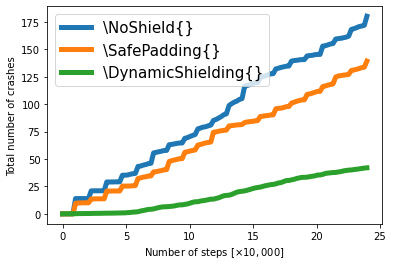

In [30]:
plot_crash(Benchmarks.CAR_RACING)

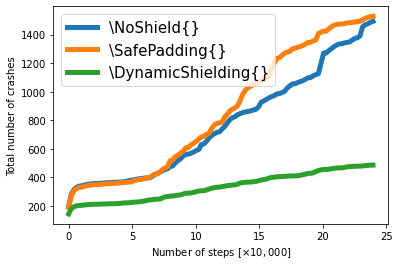

In [31]:
plot_crash(Benchmarks.CLIFFWALKING)

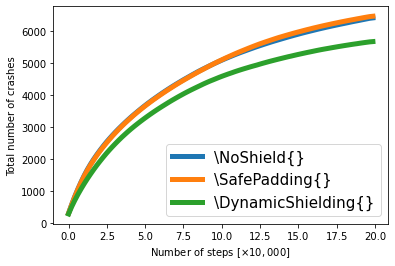

In [32]:
plot_crash(Benchmarks.SELF_DRIVING_CAR)

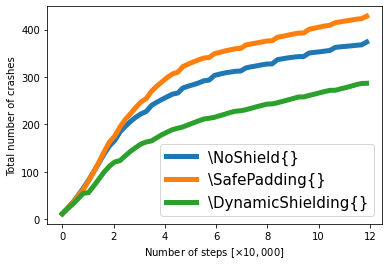

In [33]:
plot_crash(Benchmarks.SIDEWALK)

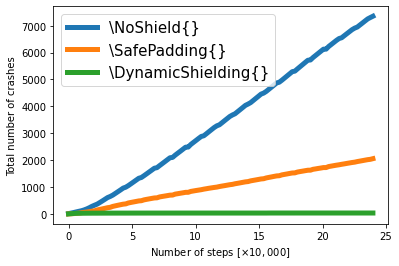

In [34]:
plot_crash(Benchmarks.TAXI)

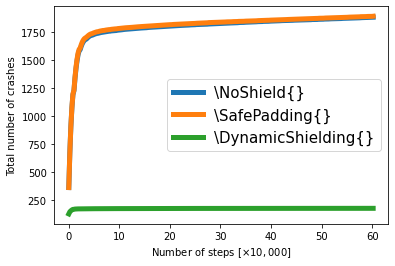

In [35]:
plot_crash(Benchmarks.WATER_TANK)

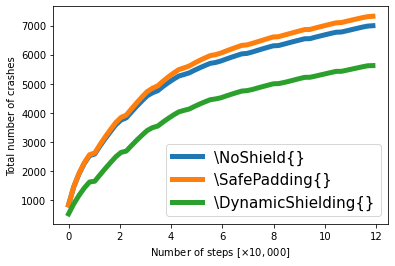

In [36]:
plot_crash(Benchmarks.GRID_WORLD)


In [37]:
stats.brunnermunzel(crash_data_frame[Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD],
                    crash_data_frame[Benchmarks.CAR_RACING, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=8.963525498205742, pvalue=4.2612469108860296e-11)

In [38]:
stats.brunnermunzel(crash_data_frame[Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD],
                    crash_data_frame[Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=5.093449811843507, pvalue=2.010060107915379e-06)

In [39]:
stats.brunnermunzel(success_rate_frame[Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.CAR_RACING, Configurations.NO_SHIELD], alternative='less')


/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7419: RuntimeWarning: invalid value encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)
/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7425: RuntimeWarning: invalid value encountered in double_scalars
  df = df_numer / df_denom


BrunnerMunzelResult(statistic=nan, pvalue=nan)

In [40]:
stats.brunnermunzel(crash_data_frame[Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD],
                    crash_data_frame[Benchmarks.GRID_WORLD, Configurations.NO_SHIELD], alternative='less')


BrunnerMunzelResult(statistic=7.146228042332727, pvalue=2.8206250668461053e-08)

In [41]:
stats.brunnermunzel(success_rate_frame[Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.GRID_WORLD, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=2.5311216633630194, pvalue=0.00715173518116019)

In [42]:
stats.brunnermunzel(success_rate_frame[Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=0.0, pvalue=0.5)

In [43]:
stats.brunnermunzel(success_rate_frame[Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.TAXI, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=-1.8824560812288853, pvalue=0.9675656525869574)

In [44]:
stats.brunnermunzel(success_rate_frame[Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.SIDEWALK, Configurations.NO_SHIELD], alternative='less')

BrunnerMunzelResult(statistic=2.0274380155456115, pvalue=0.023841310570517527)

In [45]:
stats.brunnermunzel(crash_data_frame[Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD],
                    crash_data_frame[Benchmarks.WATER_TANK, Configurations.NO_SHIELD], alternative='less')

/Users/calros/.pyenv/versions/shielded-learning/lib/python3.6/site-packages/scipy/stats/stats.py:7419: RuntimeWarning: divide by zero encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)


BrunnerMunzelResult(statistic=inf, pvalue=nan)

In [46]:
stats.brunnermunzel(success_rate_frame[Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD],
                    success_rate_frame[Benchmarks.WATER_TANK, Configurations.NO_SHIELD], alternative='less')


BrunnerMunzelResult(statistic=nan, pvalue=nan)

In [47]:
list(scalars[Benchmarks.CAR_RACING][Configurations.DYNAMIC_SHIELD][
         list(scalars[Benchmarks.CAR_RACING][Configurations.DYNAMIC_SHIELD].keys())[0]].keys())

['10 ep mean # of steps in grass',
 '10 ep mean # of visited tiles',
 '10 ep mean failure rate',
 'crash_episodes',
 'episodes',
 'grass_count',
 'rollout/ep_len_mean',
 'rollout/ep_rew_mean',
 'shield/factor',
 'shield/losing_at_start',
 'shield/max_shield_life',
 'shield/min_depth',
 'shield/reactive_system_size',
 'shield/safety_game_size',
 'shield/skip_mealy_size',
 'shield/unexplored_at_end',
 'shield/winning_at_start',
 'shield/winning_strategy_size',
 'tile_visited_count',
 'time/fps',
 'total_spin_episodes',
 'train/approx_kl',
 'train/clip_fraction',
 'train/clip_range',
 'train/entropy_loss',
 'train/explained_variance',
 'train/learning_rate',
 'train/loss',
 'train/policy_gradient_loss',
 'train/value_loss',
 'eval/crash_episodes',
 'eval/crash_rate',
 'eval/mean_ep_length',
 'eval/mean_reward',
 'eval/safe_rate',
 'eval/success_episodes',
 'eval/success_rate',
 'eval/this_episodes',
 'step',
 'wall_time',
 'eval/wall_time']

In [48]:

list(scalars[Benchmarks.SIDEWALK][Configurations.DYNAMIC_SHIELD][
         list(scalars[Benchmarks.SIDEWALK][Configurations.DYNAMIC_SHIELD].keys())[0]].keys())


['100 ep mean failure rate',
 'crash_episodes',
 'episodes',
 'rollout/ep_len_mean',
 'rollout/ep_rew_mean',
 'shield/factor',
 'shield/losing_at_start',
 'shield/max_shield_life',
 'shield/min_depth',
 'shield/reactive_system_size',
 'shield/safety_game_size',
 'shield/skip_mealy_size',
 'shield/unexplored_at_end',
 'shield/winning_at_start',
 'shield/winning_strategy_size',
 'time/fps',
 'train/approx_kl',
 'train/clip_fraction',
 'train/clip_range',
 'train/entropy_loss',
 'train/explained_variance',
 'train/learning_rate',
 'train/loss',
 'train/policy_gradient_loss',
 'train/value_loss',
 'eval/crash_episodes',
 'eval/crash_rate',
 'eval/mean_ep_length',
 'eval/mean_reward',
 'eval/safe_rate',
 'eval/success_episodes',
 'eval/success_rate',
 'eval/this_episodes',
 'step',
 'wall_time',
 'eval/wall_time']

In [49]:
# The following adds the logs to the git repository

#import subprocess

#for benchmark in Benchmarks:
#    for configuration in Configurations:
#        for key in scalars[benchmark][configuration].keys():
#            if not isinstance(key, int):
#                subprocess.run(['git', 'add', key])
#                print(key)

We make a new table dedicated to the safety during training

First, we need to create a new dataframe on the number of episodes.

In [50]:
episodes_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        episodes_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar[EPISODES_KEYS[benchmark]][-1], scalars[benchmark][configuration].values()))[-30:]


In [51]:
episodes_frame

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
0,1.51e+03,1.44e+03,8.60e+02,1.02e+04,8.58e+03,9.40e+03,1.18e+04,1.29e+04,9.56e+03,7354,...,7715,1.12e+03,1.06e+03,7.31e+02,1.27e+04,3.14e+03,2.03e+03,3.76e+03,3.88e+03,6.67e+02
1,1.80e+03,1.56e+03,8.36e+02,1.03e+04,6.13e+03,9.90e+03,1.28e+04,1.12e+04,8.58e+03,7934,...,7385,1.02e+03,1.47e+03,1.27e+03,4.16e+03,1.01e+04,6.16e+03,3.80e+03,3.73e+03,7.14e+02
2,1.50e+03,1.45e+03,8.82e+02,7.61e+03,4.46e+03,6.18e+03,1.29e+04,1.15e+04,9.55e+03,7685,...,7902,1.47e+03,1.29e+03,8.58e+02,1.32e+04,3.77e+03,7.78e+03,3.78e+03,3.72e+03,6.65e+02
3,1.50e+03,1.48e+03,8.60e+02,1.12e+04,1.03e+04,6.73e+03,1.17e+04,1.18e+04,7.96e+03,8125,...,7448,1.35e+03,1.75e+03,1.34e+03,1.29e+04,4.90e+03,9.47e+03,3.65e+03,3.80e+03,6.74e+02
4,1.46e+03,1.47e+03,8.76e+02,9.68e+03,5.82e+03,8.49e+03,1.21e+04,8.04e+03,7.06e+03,7541,...,7026,2.14e+03,1.45e+03,8.12e+02,8.18e+03,8.12e+03,2.02e+03,3.88e+03,3.74e+03,6.32e+02
5,1.70e+03,1.44e+03,8.52e+02,3.83e+03,2.93e+03,2.14e+03,1.13e+04,1.23e+04,4.97e+03,7290,...,7311,1.22e+03,1.70e+03,1.27e+03,1.33e+04,3.21e+03,2.01e+03,3.77e+03,3.86e+03,6.77e+02
6,1.65e+03,1.57e+03,8.69e+02,6.79e+03,1.27e+04,9.23e+03,1.22e+04,1.26e+04,9.31e+03,8163,...,7373,1.72e+03,1.86e+03,7.20e+02,1.30e+04,3.18e+03,8.58e+03,3.73e+03,3.72e+03,6.57e+02
7,1.43e+03,1.62e+03,9.68e+02,1.03e+04,1.12e+04,2.17e+03,6.83e+03,1.34e+04,5.03e+03,7519,...,7124,1.25e+03,1.92e+03,9.26e+02,1.27e+04,3.25e+03,6.95e+03,3.70e+03,3.86e+03,6.47e+02
8,1.48e+03,1.52e+03,1.00e+03,7.34e+03,1.13e+04,2.16e+03,1.15e+04,1.11e+04,5.66e+03,7882,...,7086,1.09e+03,1.54e+03,1.76e+03,1.30e+04,7.06e+03,3.74e+03,3.88e+03,3.69e+03,6.14e+02
9,1.48e+03,1.44e+03,8.94e+02,1.16e+04,9.40e+03,9.20e+03,1.20e+04,1.28e+04,6.16e+03,8404,...,7282,1.07e+03,1.02e+03,1.24e+03,9.76e+03,8.91e+03,2.02e+03,3.70e+03,3.77e+03,6.62e+02


In [52]:
episodes_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,...,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01,3.00e+01
mean,1.53e+03,1.51e+03,8.96e+02,9.11e+03,8.72e+03,7.59e+03,1.11e+04,1.17e+04,8.27e+03,7.78e+03,...,7.30e+03,1.45e+03,1.47e+03,1.01e+03,1.08e+04,5.67e+03,4.42e+03,3.76e+03,3.77e+03,6.65e+02
std,8.86e+01,5.84e+01,4.85e+01,3.44e+03,3.24e+03,2.80e+03,1.83e+03,1.21e+03,1.62e+03,2.91e+02,...,2.48e+02,2.93e+02,2.64e+02,2.69e+02,3.26e+03,2.35e+03,2.78e+03,6.70e+01,6.34e+01,2.73e+01
min,1.43e+03,1.44e+03,8.28e+02,2.91e+03,2.92e+03,2.14e+03,6.83e+03,8.04e+03,4.97e+03,7.29e+03,...,6.85e+03,9.94e+02,9.98e+02,6.90e+02,3.19e+03,2.97e+03,2.01e+03,3.65e+03,3.68e+03,6.12e+02
25%,1.47e+03,1.47e+03,8.60e+02,7.30e+03,6.13e+03,5.94e+03,1.11e+04,1.12e+04,7.49e+03,7.56e+03,...,7.14e+03,1.26e+03,1.31e+03,7.76e+02,9.14e+03,3.27e+03,2.02e+03,3.71e+03,3.73e+03,6.49e+02
50%,1.52e+03,1.50e+03,8.88e+02,9.86e+03,9.75e+03,8.74e+03,1.16e+04,1.18e+04,8.79e+03,7.74e+03,...,7.27e+03,1.48e+03,1.47e+03,9.58e+02,1.27e+04,4.89e+03,2.70e+03,3.74e+03,3.75e+03,6.64e+02
75%,1.54e+03,1.55e+03,9.14e+02,1.12e+04,1.11e+04,9.88e+03,1.21e+04,1.24e+04,9.52e+03,7.93e+03,...,7.44e+03,1.58e+03,1.61e+03,1.19e+03,1.30e+04,7.50e+03,6.95e+03,3.81e+03,3.81e+03,6.82e+02
max,1.80e+03,1.63e+03,1.00e+03,1.79e+04,1.27e+04,1.10e+04,1.41e+04,1.38e+04,1.04e+04,8.40e+03,...,7.90e+03,2.24e+03,1.96e+03,1.76e+03,1.39e+04,1.01e+04,9.47e+03,3.89e+03,3.91e+03,7.19e+02


The following is the new table dedicated to the training phase.

In [53]:
TRAINING_LABELS = ['Undes. eps.sodes', 'total episodes']

training_summary_dict = dict()
index_list = []
configuration_name = {
    Configurations.NO_SHIELD: 'NO_SHIELD',
    Configurations.SAFE_PADDING: 'SAFE_PADDING',
    Configurations.DYNAMIC_SHIELD: 'DYNAMIC_SHIELD',
}

for configuration in ConfigurationToLaTeX.keys():
    for frame_name in TRAINING_LABELS:
        if frame_name == 'Undes. eps.sodes':
            frame = crash_data_frame.describe()
        elif frame_name == 'total episodes':
            frame = episodes_frame.describe()
        else:
            raise ValueError('Unknown frame name: {}'.format(frame_name))

        #index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in BenchmarkToLaTeX.keys():
            if (ConfigurationToLaTeX[configuration], frame_name) not in training_summary_dict:
                training_summary_dict[ConfigurationToLaTeX[configuration], frame_name] = []
            training_summary_dict[ConfigurationToLaTeX[configuration], frame_name].append(
                frame[benchmark, configuration]['mean'])
    for benchmark in BenchmarkToLaTeX.keys():
        if (ConfigurationToLaTeX[configuration], 'undes. rate') not in training_summary_dict:
            training_summary_dict[ConfigurationToLaTeX[configuration], 'undes. rate'] = []
        training_summary_dict[ConfigurationToLaTeX[configuration], 'undes. rate'].append(
            crash_data_frame.describe()[benchmark, configuration]['mean'] /
            episodes_frame.describe()[benchmark, configuration]['mean'])

training_summary_frame = pd.DataFrame(training_summary_dict, index=BenchmarkToLaTeX.values())
training_summary_frame

\NoShield{}                       \
                      Undes. eps.sodes       total episodes   
\WaterTank{}                  1.88e+03             3.76e+03   
\GridWorld{}                  7.00e+03             1.11e+04   
\CliffWalking{}               1.49e+03             9.11e+03   
\Taxi{}                       8.72e+03             1.08e+04   
\SelfDrivingCar{}             6.40e+03             7.78e+03   
\SideWalk{}                   3.74e+02             1.45e+03   
\CarRacing{}                  1.80e+02             1.53e+03   

                                             \SafePadding{}  \
                           undes. rate     Undes. eps.sodes   
\WaterTank{}                  5.01e-01             1.89e+03   
\GridWorld{}                  6.29e-01             7.32e+03   
\CliffWalking{}               1.64e-01             1.53e+03   
\Taxi{}                       8.10e-01             2.06e+03   
\SelfDrivingCar{}             8.23e-01             6.45e+03   
\SideWalk{}                   2.57e-01             4.28e+02   
\CarRacing{}                  1.18e-01             1.41e+02   

                                                             \
                        total episodes          undes. rate   
\WaterTank{}                  3.77e+03             5.02e-01   
\GridWorld{}                  1.17e+04             6.28e-01   
\CliffWalking{}               8.72e+03             1.75e-01   
\Taxi{}                       5.67e+03             3.63e-01   
\SelfDrivingCar{}             7.82e+03             8.25e-01   
\SideWalk{}                   1.47e+03             2.92e-01   
\CarRacing{}                  1.51e+03             9.34e-02   

                   \DynamicShielding{}                       \
                      Undes. eps.sodes       total episodes   
\WaterTank{}                  1.77e+02             6.65e+02   
\GridWorld{}                  5.62e+03             8.27e+03   
\CliffWalking{}               4.78e+02             7.59e+03   
\Taxi{}                       3.78e+01             4.42e+03   
\SelfDrivingCar{}             5.66e+03             7.30e+03   
\SideWalk{}                   2.73e+02             1.01e+03   
\CarRacing{}                  4.17e+01             8.96e+02   

                                        
                           undes. rate  
\WaterTank{}                  2.66e-01  
\GridWorld{}                  6.80e-01  
\CliffWalking{}               6.30e-02  
\Taxi{}                       8.54e-03  
\SelfDrivingCar{}             7.75e-01  
\SideWalk{}                   2.70e-01  
\CarRacing{}                  4.66e-02

In [54]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub('episodes /', '/',
             re.sub(r'&([^&]+)&([^&]+)&', r'&\1/\2&', re.sub(r' +', ' ', training_summary_frame.to_latex()))).replace(
    'multicolumn{3}', 'multicolumn{2}', ).replace("/ \\", "& \\"))

\begin{tabular}{lrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{\textbackslash NoShield\{\}} & \multicolumn{2}{l}{\textbackslash SafePadding\{\}} & \multicolumn{2}{l}{\textbackslash DynamicShielding\{\}} \\
{} & Undes. eps.sodes / total episodes & undes. rate & Undes. eps.sodes / total episodes & undes. rate & Undes. eps.sodes / total episodes & undes. rate \\
\midrule
\textbackslash WaterTank\{\} & 1883.67 / 3759.47 & 0.50 & 1892.40 / 3772.07 & 0.50 & 177.13 / 665.37 & 0.27 \\
\textbackslash GridWorld\{\} & 6996.40 / 11115.57 & 0.63 & 7322.23 / 11667.37 & 0.63 & 5623.43 / 8272.07 & 0.68 \\
\textbackslash CliffWalking\{\} & 1493.20 / 9112.20 & 0.16 & 1528.67 / 8715.53 & 0.18 & 478.20 / 7592.27 & 0.06 \\
\textbackslash Taxi\{\} & 8723.13 / 10774.03 & 0.81 & 2057.33 / 5668.40 & 0.36 & 37.77 / 4423.37 & 0.01 \\
\textbackslash SelfDrivingCar\{\} & 6403.07 / 7776.73 & 0.82 & 6454.60 / 7823.87 & 0.82 & 5662.40 / 7302.37 & 0.78 \\
\textbackslash SideWalk\{\} & 373.60 / 1453.40 & 0.26 & 427.93 / 

We also observe the safety in the later half of the training

In [55]:
late_crash_data_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        late_crash_data_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar[CRASH_KEYS[benchmark]][-1] - scalar[CRASH_KEYS[benchmark]][
                -len(scalar[CRASH_KEYS[benchmark]]) // 2],
                scalars[benchmark][configuration].values()))[-30:]

In [56]:
late_crash_data_frame

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
0,36.00,65.00,12.00,237.00,821.00,215.00,880.00,1023.00,907.00,1454,...,1761,50.00,65.00,71.00,7073.00,478.00,0.00,40.00,78.00,1.00
1,0.00,60.00,43.00,422.00,17.00,176.00,1042.00,1294.00,1312.00,1915,...,1351,72.00,73.00,3.00,2320.00,84.00,0.00,42.00,57.00,0.00
2,32.00,33.00,41.00,156.00,44.00,0.00,910.00,938.00,915.00,1374,...,1897,20.00,45.00,174.00,7371.00,777.00,44.00,40.00,46.00,1.00
3,10.00,7.00,4.00,1580.00,2374.00,356.00,993.00,787.00,1083.00,1851,...,1350,14.00,7.00,5.00,6954.00,2598.00,0.00,46.00,33.00,0.00
4,0.00,35.00,9.00,307.00,200.00,484.00,1043.00,1339.00,1315.00,1158,...,887,144.00,378.00,210.00,1182.00,535.00,0.00,77.00,49.00,0.00
5,126.00,45.00,2.00,16.00,5.00,1.00,801.00,938.00,805.00,1026,...,1312,3.00,12.00,135.00,7488.00,778.00,0.00,53.00,52.00,0.00
6,79.00,33.00,17.00,307.00,984.00,126.00,962.00,1233.00,1429.00,2045,...,858,15.00,156.00,5.00,7490.00,736.00,0.00,44.00,34.00,2.00
7,62.00,11.00,124.00,571.00,522.00,1.00,572.00,1160.00,649.00,576,...,1022,46.00,644.00,77.00,6954.00,1264.00,0.00,68.00,50.00,1.00
8,0.00,396.00,2.00,96.00,3448.00,0.00,1214.00,1148.00,696.00,2271,...,878,220.00,264.00,453.00,7012.00,406.00,0.00,91.00,45.00,1.00
9,64.00,0.00,25.00,1527.00,986.00,226.00,1112.00,1070.00,958.00,1446,...,996,40.00,53.00,146.00,328.00,128.00,0.00,60.00,68.00,0.00


In [57]:
late_crash_data_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,94.07,68.13,28.27,754.77,741.40,142.53,1216.83,1270.23,1110.43,1314.67,...,1080.47,70.20,78.83,68.77,4751.67,1017.97,1.57,55.17,52.43,0.77
std,91.79,74.59,52.07,1382.53,830.49,125.43,1111.10,1022.23,751.43,547.69,...,330.33,90.06,134.68,105.04,3237.87,928.18,8.02,14.47,12.69,1.72
min,0.00,0.00,0.00,2.00,5.00,0.00,554.00,666.00,613.00,450.00,...,511.00,2.00,0.00,0.00,62.00,83.00,0.00,39.00,33.00,0.00
25%,6.25,33.00,2.50,111.00,41.00,29.25,876.25,903.25,859.50,838.75,...,880.25,18.25,14.00,5.50,658.50,361.00,0.00,45.25,44.25,0.00
50%,85.00,51.50,8.50,389.50,529.00,128.00,1008.50,986.00,897.00,1342.00,...,990.50,36.00,33.00,17.50,6983.00,711.50,0.00,50.50,50.00,0.00
75%,126.75,81.50,22.25,856.00,975.25,214.75,1082.75,1159.00,1053.50,1781.25,...,1296.25,72.75,71.00,89.00,7366.00,1771.75,0.00,62.25,56.75,1.00
max,344.00,396.00,241.00,7604.00,3448.00,484.00,6680.00,5052.00,4547.00,2271.00,...,1897.00,413.00,644.00,453.00,7543.00,2677.00,44.00,91.00,82.00,7.00


In [58]:
late_episodes_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        late_episodes_frame[benchmark, configuration] = list(
            map(lambda scalar: scalar[EPISODES_KEYS[benchmark]][-1] - scalar[EPISODES_KEYS[benchmark]][
                -len(scalar[EPISODES_KEYS[benchmark]]) // 2],
                scalars[benchmark][configuration].values()))[-30:]


In [59]:
late_episodes_frame

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
0,723.00,710.00,424.00,5330.00,4232.00,5377.00,4521.00,5542.00,3852.00,2425,...,2686,564.00,537.00,349.00,7083.00,1458.00,983.00,1027.00,1040.00,250.00
1,851.00,751.00,410.00,4695.00,1300.00,6047.00,5525.00,4194.00,3160.00,2661,...,2513,504.00,705.00,660.00,2389.00,5316.00,2330.00,1028.00,1035.00,250.00
2,753.00,711.00,439.00,4590.00,2820.00,984.00,5456.00,4524.00,4221.00,2510,...,2657,768.00,703.00,451.00,7381.00,1540.00,5658.00,1025.00,1028.00,250.00
3,760.00,714.00,432.00,7172.00,6827.00,4745.00,4893.00,4441.00,2943.00,2736,...,2531,753.00,803.00,641.00,6964.00,2636.00,5678.00,1028.00,1028.00,249.00
4,717.00,748.00,439.00,4606.00,4171.00,5173.00,4992.00,1846.00,2747.00,2405,...,2359,609.00,668.00,432.00,2990.00,3587.00,983.00,1043.00,1032.00,249.00
5,903.00,715.00,438.00,2146.00,1295.00,983.00,4228.00,5339.00,1371.00,2378,...,2469,690.00,816.00,412.00,7498.00,1552.00,983.00,1031.00,1031.00,250.00
6,873.00,785.00,432.00,5016.00,6925.00,5070.00,5113.00,5418.00,3242.00,2711,...,2374,751.00,714.00,329.00,7500.00,1470.00,3910.00,1030.00,1025.00,251.00
7,710.00,834.00,470.00,5790.00,6117.00,984.00,1350.00,5661.00,1299.00,2307,...,2435,716.00,859.00,432.00,6964.00,1712.00,3243.00,1038.00,1030.00,250.00
8,750.00,780.00,541.00,3149.00,5727.00,983.00,5094.00,4257.00,1293.00,2645,...,2380,557.00,588.00,641.00,7031.00,5027.00,983.00,1050.00,1030.00,251.00
9,715.00,718.00,406.00,6512.00,5060.00,5255.00,4861.00,5116.00,1475.00,2542,...,2427,560.00,487.00,405.00,5510.00,4970.00,983.00,1033.00,1040.00,250.00


In [60]:
late_episodes_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,770.77,760.90,455.40,4852.33,4533.93,4226.20,4369.20,4626.80,3121.40,2490.13,...,2438.70,720.63,716.90,500.33,5984.23,2996.83,2198.80,1033.03,1032.13,250.17
std,60.82,45.03,44.27,2455.59,2163.66,2034.00,1308.65,885.78,1018.74,142.52,...,101.83,103.90,122.80,130.60,1864.22,1534.64,1716.40,6.91,5.17,0.91
min,703.00,706.00,401.00,1293.00,1294.00,983.00,1350.00,1846.00,1281.00,2277.00,...,2299.00,477.00,479.00,329.00,1406.00,1349.00,983.00,1025.00,1025.00,249.00
25%,718.50,723.50,419.50,3254.50,2550.75,2777.50,4231.75,4327.75,2778.25,2378.75,...,2362.75,696.50,668.75,393.00,5133.25,1553.75,983.00,1028.00,1029.25,250.00
50%,756.50,751.00,439.00,5287.00,5053.50,5083.00,4667.00,4784.00,3340.50,2463.50,...,2420.00,755.00,782.00,458.00,6997.50,2607.50,983.00,1031.00,1031.00,250.00
75%,791.75,778.75,476.00,6124.75,6211.75,5885.00,5044.50,5111.00,3847.25,2599.25,...,2492.50,794.25,805.50,641.00,7376.00,4019.00,3515.25,1037.00,1034.50,250.00
max,903.00,885.00,549.00,12543.00,7971.00,6797.00,6681.00,5993.00,4547.00,2816.00,...,2686.00,828.00,859.00,671.00,7553.00,5932.00,5678.00,1050.00,1045.00,254.00


In [61]:
late_training_summary_dict = dict()

for configuration in ConfigurationToLaTeX.keys():
    for frame_name in TRAINING_LABELS:
        if frame_name == 'Undes. eps.sodes':
            frame = late_crash_data_frame.describe()
        elif frame_name == 'total episodes':
            frame = late_episodes_frame.describe()
        else:
            raise ValueError('Unknown frame name: {}'.format(frame_name))

        #index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in BenchmarkToLaTeX.keys():
            if (ConfigurationToLaTeX[configuration], frame_name) not in late_training_summary_dict:
                late_training_summary_dict[ConfigurationToLaTeX[configuration], frame_name] = []
            late_training_summary_dict[ConfigurationToLaTeX[configuration], frame_name].append(
                frame[benchmark, configuration]['mean'])
    for benchmark in BenchmarkToLaTeX.keys():
        if (ConfigurationToLaTeX[configuration], 'undes. rate') not in late_training_summary_dict:
            late_training_summary_dict[ConfigurationToLaTeX[configuration], 'undes. rate'] = []
        late_training_summary_dict[ConfigurationToLaTeX[configuration], 'undes. rate'].append(
            late_crash_data_frame.describe()[benchmark, configuration]['mean'] /
            late_episodes_frame.describe()[benchmark, configuration]['mean'])

training_summary_frame = pd.DataFrame(late_training_summary_dict, index=BenchmarkToLaTeX.values())
training_summary_frame

\NoShield{}                       \
                      Undes. eps.sodes       total episodes   
\WaterTank{}                     55.17              1033.03   
\GridWorld{}                   1216.83              4369.20   
\CliffWalking{}                 754.77              4852.33   
\Taxi{}                        4751.67              5984.23   
\SelfDrivingCar{}              1314.67              2490.13   
\SideWalk{}                      70.20               720.63   
\CarRacing{}                     94.07               770.77   

                                             \SafePadding{}  \
                           undes. rate     Undes. eps.sodes   
\WaterTank{}                      0.05                52.43   
\GridWorld{}                      0.28              1270.23   
\CliffWalking{}                   0.16               741.40   
\Taxi{}                           0.79              1017.97   
\SelfDrivingCar{}                 0.53              1354.83   
\SideWalk{}                       0.10                78.83   
\CarRacing{}                      0.12                68.13   

                                                             \
                        total episodes          undes. rate   
\WaterTank{}                   1032.13                 0.05   
\GridWorld{}                   4626.80                 0.27   
\CliffWalking{}                4533.93                 0.16   
\Taxi{}                        2996.83                 0.34   
\SelfDrivingCar{}              2524.63                 0.54   
\SideWalk{}                     716.90                 0.11   
\CarRacing{}                    760.90                 0.09   

                   \DynamicShielding{}                       \
                      Undes. eps.sodes       total episodes   
\WaterTank{}                      0.77               250.17   
\GridWorld{}                   1110.43              3121.40   
\CliffWalking{}                 142.53              4226.20   
\Taxi{}                           1.57              2198.80   
\SelfDrivingCar{}              1080.47              2438.70   
\SideWalk{}                      68.77               500.33   
\CarRacing{}                     28.27               455.40   

                                        
                           undes. rate  
\WaterTank{}                      0.00  
\GridWorld{}                      0.36  
\CliffWalking{}                   0.03  
\Taxi{}                           0.00  
\SelfDrivingCar{}                 0.44  
\SideWalk{}                       0.14  
\CarRacing{}                      0.06

## (A sort of) Efficiency of training

In [62]:
EVALUATION_INTERVAL = 10_000

evaluation_scalars = dict()

for benchmark in Benchmarks:
    evaluation_scalars[benchmark] = dict()
    for configuration in Configurations:
        evaluation_scalars[benchmark][configuration] = dict()
        for key in list(scalars[benchmark][configuration].keys())[-30:]:
            evaluation_scalars[benchmark][configuration][key] = dict()
            evaluation_scalars[benchmark][configuration][key]['eval/mean_reward'] =\
                scalars[benchmark][configuration][key]['eval/mean_reward']
            evaluation_scalars[benchmark][configuration][key]['eval/best_mean_reward'] = []
            for i in range(len(scalars[benchmark][configuration][key]['eval/mean_reward'])):
                evaluation_scalars[benchmark][configuration][key]['eval/best_mean_reward'].append(
                    max(scalars[benchmark][configuration][key]['eval/mean_reward'][0:i + 1]))
            #evaluation_scalars[benchmark][configuration][key]['eval/crash_rate'] = scalars[benchmark][configuration][key]['eval/crash_rate']
            #evaluation_scalars[benchmark][configuration][key]['eval/best_crash_rate'] = []
            #for i in range(len(scalars[benchmark][configuration][key]['eval/crash_rate'])):
            #    evaluation_scalars[benchmark][configuration][key]['eval/best_crash_rate'].append(
            #        max(scalars[benchmark][configuration][key]['eval/crash_rate'][0:i + 1]))
            evaluation_scalars[benchmark][configuration][key]['eval/safe_rate'] =\
                scalars[benchmark][configuration][key]['eval/safe_rate']
            evaluation_scalars[benchmark][configuration][key]['eval/best_safe_rate'] = []
            for i in range(len(scalars[benchmark][configuration][key]['eval/safe_rate'])):
                evaluation_scalars[benchmark][configuration][key]['eval/best_safe_rate'].append(
                    max(scalars[benchmark][configuration][key]['eval/safe_rate'][0:i + 1]))
            evaluation_scalars[benchmark][configuration][key]['eval/success_rate'] =\
                scalars[benchmark][configuration][key]['eval/safe_rate']
            evaluation_scalars[benchmark][configuration][key]['eval/best_success_rate'] = []
            for i in range(len(scalars[benchmark][configuration][key]['eval/success_rate'])):
                evaluation_scalars[benchmark][configuration][key]['eval/best_success_rate'].append(
                    max(scalars[benchmark][configuration][key]['eval/success_rate'][0:i + 1]))
            if benchmark == Benchmarks.SELF_DRIVING_CAR:
                evaluation_scalars[benchmark][configuration][key]['episodes'] = scalars[benchmark][configuration][key][
                    'eval/training_episodes']
                evaluation_scalars[benchmark][configuration][key]['crash_episodes'] =\
                    scalars[benchmark][configuration][key]['eval/training_crash_episodes']
                evaluation_scalars[benchmark][configuration][key]['steps'] = list(
                    range(EVALUATION_INTERVAL, 200000, EVALUATION_INTERVAL))
            else:
                max_step = (scalars[benchmark][configuration][key]['step'][
                                -1] // EVALUATION_INTERVAL) * EVALUATION_INTERVAL
                steps = scalars[benchmark][configuration][key]['step']
                steps += list(range(EVALUATION_INTERVAL, max_step + 1, EVALUATION_INTERVAL))
                steps = sorted(list(set(steps)))
                assert len(steps) == len(scalars[benchmark][configuration][key][EPISODES_KEYS[
                    benchmark]]), f"{len(steps)} != {len(scalars[benchmark][configuration][key][EPISODES_KEYS[benchmark]])}"
                evaluation_scalars[benchmark][configuration][key]['episodes'] = list(map(lambda tpl: tpl[1], filter(
                    lambda tpl: tpl[0] % EVALUATION_INTERVAL == 0,
                    zip(steps, scalars[benchmark][configuration][key][EPISODES_KEYS[benchmark]]))))
                evaluation_scalars[benchmark][configuration][key]['crash_episodes'] = list(map(lambda tpl: tpl[1],
                                                                                               filter(lambda tpl: tpl[
                                                                                                                      0] % EVALUATION_INTERVAL == 0,
                                                                                                      zip(steps,
                                                                                                          scalars[
                                                                                                              benchmark][
                                                                                                              configuration][
                                                                                                              key][
                                                                                                              CRASH_KEYS[
                                                                                                                  benchmark]]))))
                evaluation_scalars[benchmark][configuration][key]['steps'] = list(
                    range(EVALUATION_INTERVAL, max_step + 1, EVALUATION_INTERVAL))
            evaluation_scalars[benchmark][configuration][key]['eval/wall_time'] =\
            scalars[benchmark][configuration][key]['eval/wall_time']

In [63]:
import math
import matplotlib.pyplot as plt
import tikzplotlib


def plot_eval_scalars(benchmark: Benchmarks, xlabel, ylabel, xlabelPlot=None, ylabelPlot=None):
    xs = dict()
    ys = dict()
    if xlabelPlot is None:
        xlabelPlot = xlabel
    if ylabelPlot is None:
        ylabelPlot = ylabel
    max_x = 0
    max_y = 0
    for configuration in Configurations:
        xs[configuration] = pd.DataFrame(list(map(lambda scalar: scalar[xlabel],
                                                  evaluation_scalars[benchmark][configuration].values()))).mean()
        ys[configuration] = pd.DataFrame(list(map(lambda scalar: scalar[ylabel],
                                                  evaluation_scalars[benchmark][configuration].values()))).mean()
        max_x = max(max_x, max(xs[configuration].max(), abs(xs[configuration].min())))
        max_y = max(max_y, max(ys[configuration].max(), abs(ys[configuration].min())))

    for configuration in Configurations:
        if max_x >= 100:
            xs[configuration] = pd.DataFrame(list(
                map(lambda scalar: map(lambda s: s / (10 ** (int(math.log(max_x, 10)) - 1)), scalar[xlabel]),
                    evaluation_scalars[benchmark][configuration].values()))).mean()
        else:
            xs[configuration] = pd.DataFrame(list(map(lambda scalar: scalar[xlabel],
                                                      evaluation_scalars[benchmark][configuration].values()))).mean()
        if max_y >= 100:
            ys[configuration] = pd.DataFrame(list(
                map(lambda scalar: map(lambda s: s / (10 ** (int(math.log(max_y, 10)) - 1)), scalar[ylabel]),
                    evaluation_scalars[benchmark][configuration].values()))).mean()
        else:
            ys[configuration] = pd.DataFrame(list(map(lambda scalar: scalar[ylabel],
                                                  evaluation_scalars[benchmark][configuration].values()))).mean()
        plt.plot(xs[configuration], ys[configuration], label=configuration.value, linewidth=3)
    #crash_plot_frame.set_index(crash_plot_frame.index * 2048 / 10000.0, inplace=True)
    #ax = crash_plot_frame[Configurations.NO_SHIELD].plot(linewidth=5)
    #ax = crash_plot_frame[Configurations.SAFE_PADDING].plot(ax=ax, linewidth=5)
    #ax = crash_plot_frame[Configurations.DYNAMIC_SHIELD].plot(ax=ax, linewidth=5)
    if max_x >= 100:
        plt.xlabel(f'{xlabelPlot} [$\\times {10 ** (int(math.log(max_x, 10)) - 1)}$]')
    else:
        plt.xlabel(xlabelPlot)

    if max_y >= 100:
        plt.ylabel(f'{ylabelPlot} [$\\times {10 ** (int(math.log(max_y, 10)) - 1)}$]')
    else:
        plt.ylabel(ylabelPlot)    # plt.legend([r'\NoShield{}', r'\SafePadding{}', r'\DynamicShielding{}'], prop={'size': 15})
    #mpl.rcParams.update(mpl.rcParamsDefault)
    tikzplotlib.save(f'{xlabel.replace("/", "-")}_{ylabel.replace("/", "-")}_{benchmark}.tikz.tex',
                     axis_height='3.3cm', axis_width='3.3cm', float_format='5.2f')
    plt.show()

Benchmarks.CAR_RACING


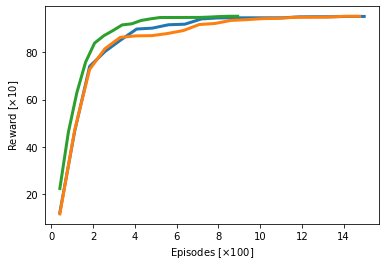

Benchmarks.CLIFFWALKING


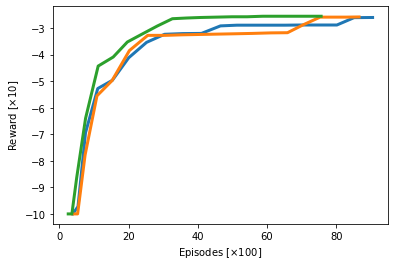

Benchmarks.GRID_WORLD


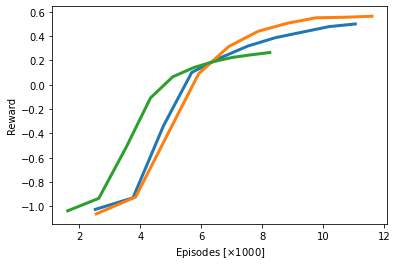

Benchmarks.SELF_DRIVING_CAR


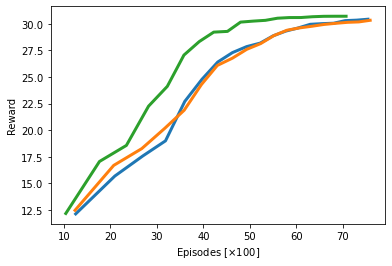

Benchmarks.SIDEWALK


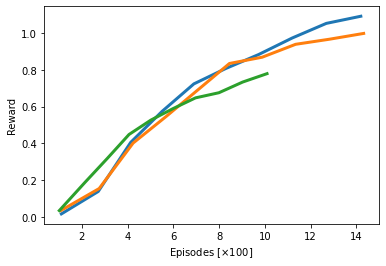

Benchmarks.TAXI


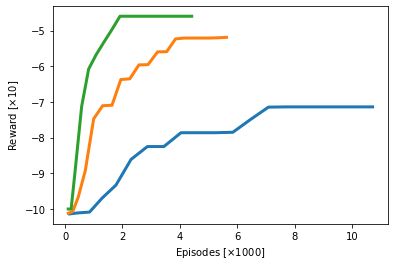

Benchmarks.WATER_TANK


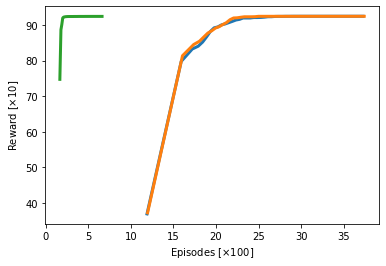

In [64]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'episodes', 'eval/best_mean_reward', 'Episodes', 'Reward')

Benchmarks.CAR_RACING


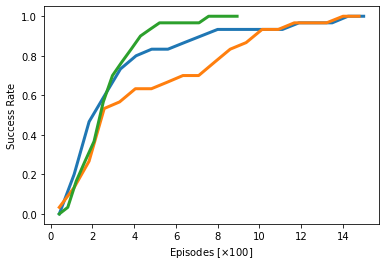

Benchmarks.CLIFFWALKING


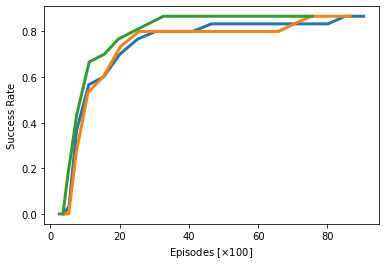

Benchmarks.GRID_WORLD


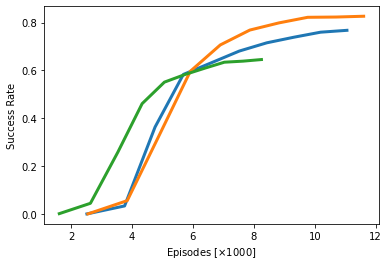

Benchmarks.SELF_DRIVING_CAR


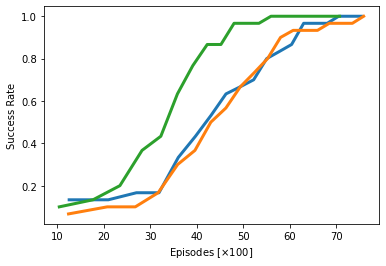

Benchmarks.SIDEWALK


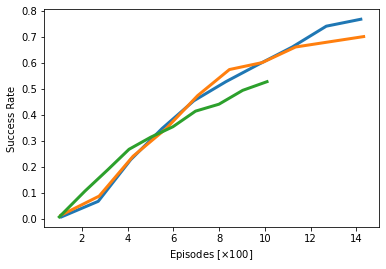

Benchmarks.TAXI


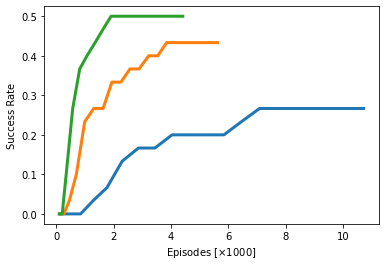

Benchmarks.WATER_TANK


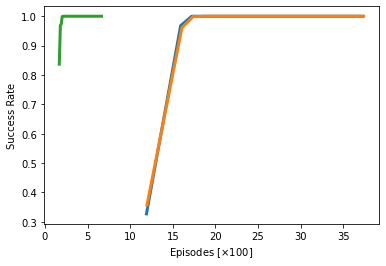

In [65]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'episodes', 'eval/best_success_rate', 'Episodes', 'Success Rate')

Benchmarks.CAR_RACING


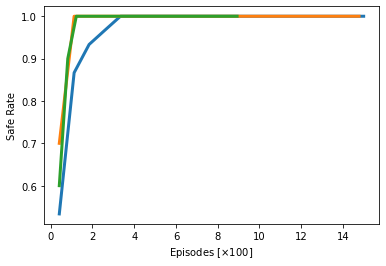

Benchmarks.CLIFFWALKING


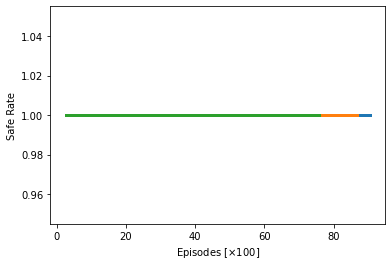

Benchmarks.GRID_WORLD


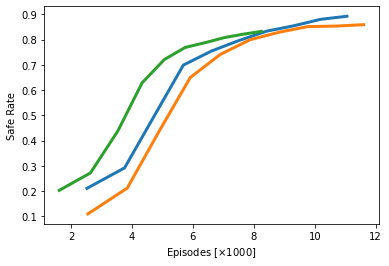

Benchmarks.SELF_DRIVING_CAR


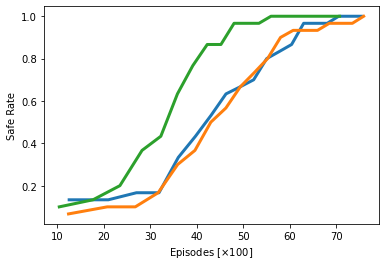

Benchmarks.SIDEWALK


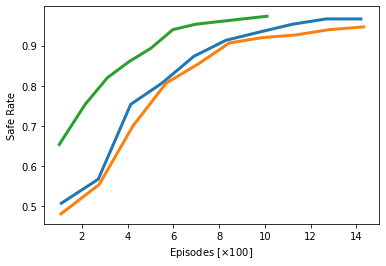

Benchmarks.TAXI


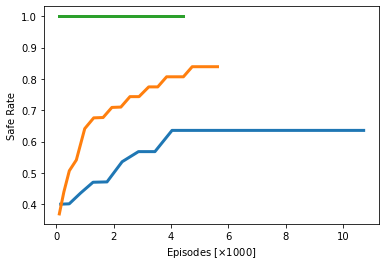

Benchmarks.WATER_TANK


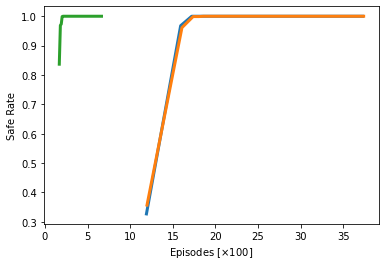

In [66]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'episodes', 'eval/best_safe_rate', 'Episodes', 'Safe Rate')

Benchmarks.CAR_RACING


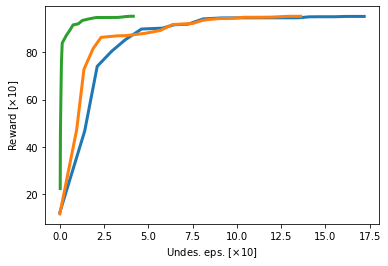

Benchmarks.CLIFFWALKING


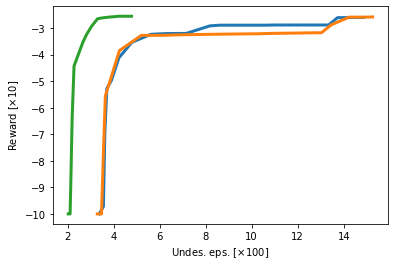

Benchmarks.GRID_WORLD


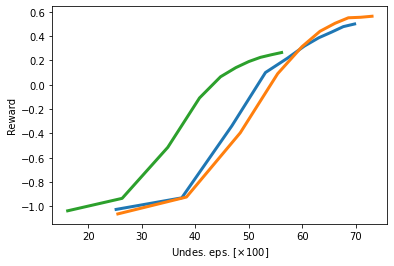

Benchmarks.SELF_DRIVING_CAR


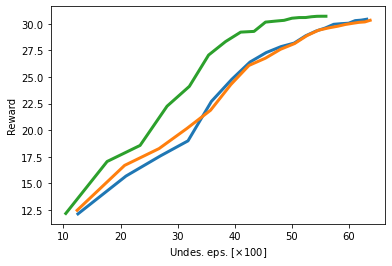

Benchmarks.SIDEWALK


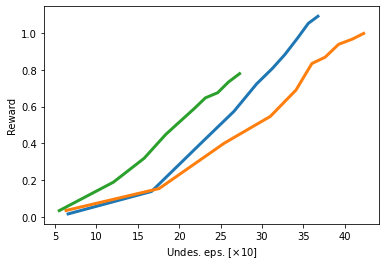

Benchmarks.TAXI


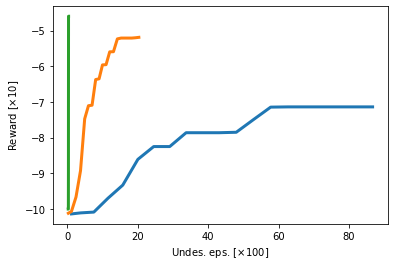

Benchmarks.WATER_TANK


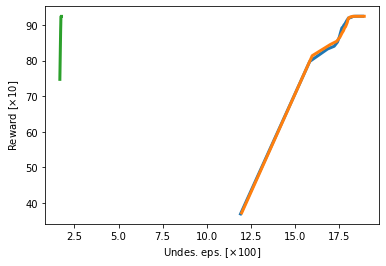

In [67]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'crash_episodes', 'eval/best_mean_reward', 'Undes. eps.', 'Reward')

Benchmarks.CAR_RACING


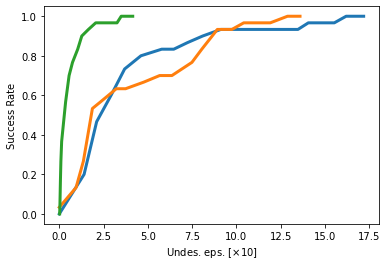

Benchmarks.CLIFFWALKING


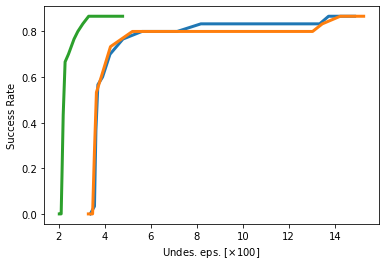

Benchmarks.GRID_WORLD


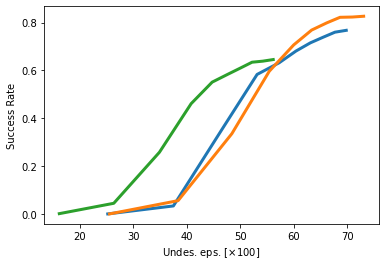

Benchmarks.SELF_DRIVING_CAR


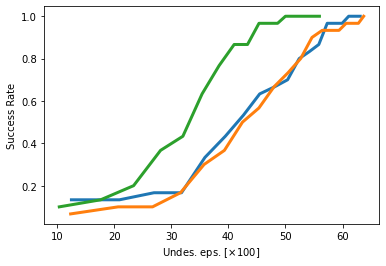

Benchmarks.SIDEWALK


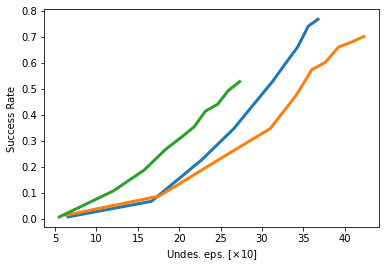

Benchmarks.TAXI


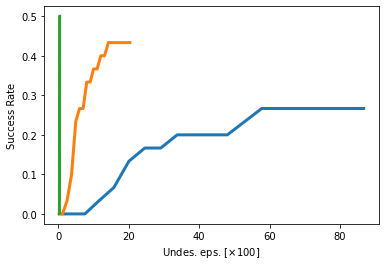

Benchmarks.WATER_TANK


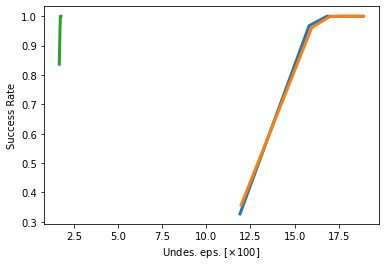

In [68]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'crash_episodes', 'eval/best_success_rate', 'Undes. eps.', 'Success Rate')

Benchmarks.CAR_RACING


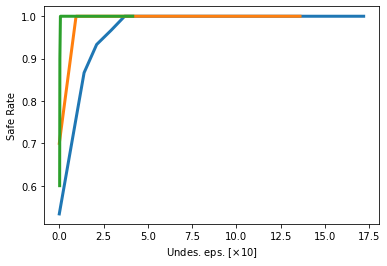

Benchmarks.CLIFFWALKING


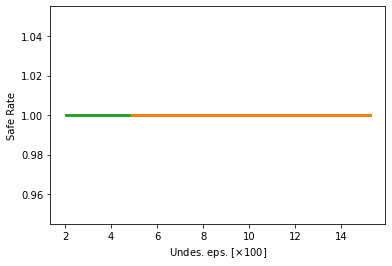

Benchmarks.GRID_WORLD


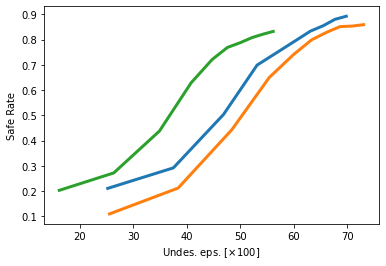

Benchmarks.SELF_DRIVING_CAR


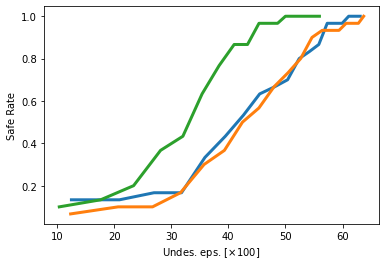

Benchmarks.SIDEWALK


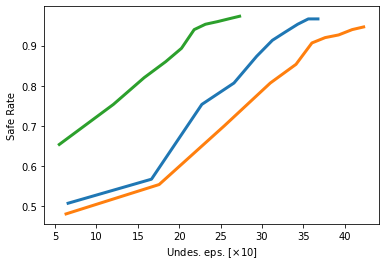

Benchmarks.TAXI


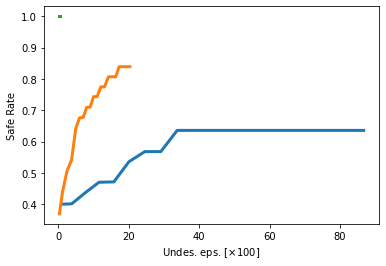

Benchmarks.WATER_TANK


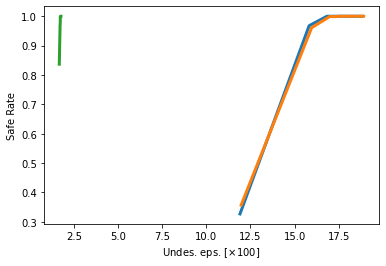

In [69]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'crash_episodes', 'eval/best_safe_rate', 'Undes. eps.', 'Safe Rate')

Benchmarks.CAR_RACING


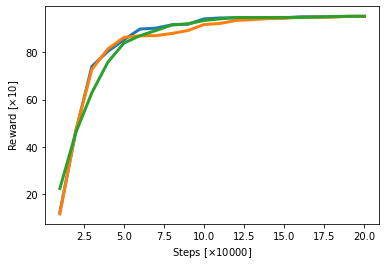

Benchmarks.CLIFFWALKING


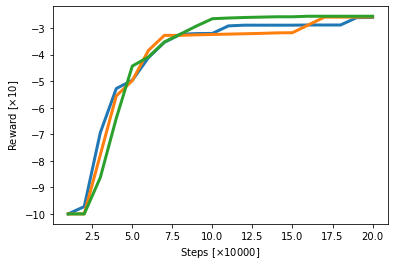

Benchmarks.GRID_WORLD


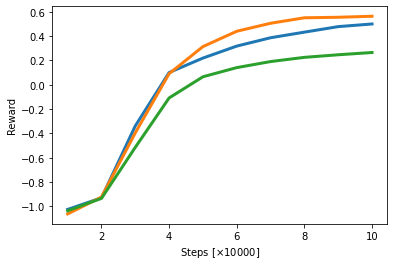

Benchmarks.SELF_DRIVING_CAR


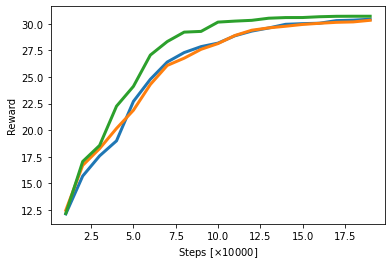

Benchmarks.SIDEWALK


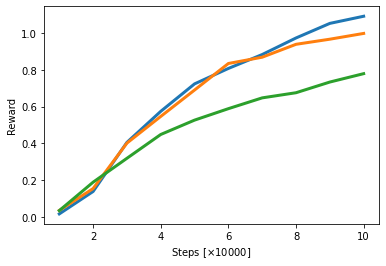

Benchmarks.TAXI


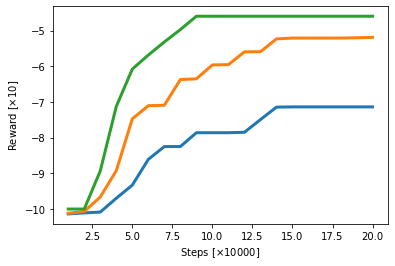

Benchmarks.WATER_TANK


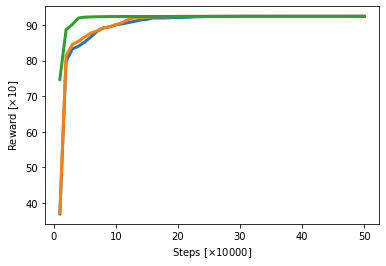

In [70]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'eval/best_mean_reward', 'Steps', 'Reward')

Benchmarks.CAR_RACING


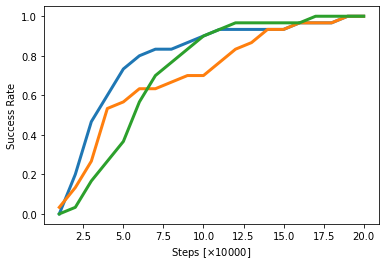

Benchmarks.CLIFFWALKING


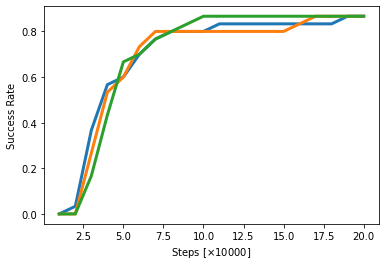

Benchmarks.GRID_WORLD


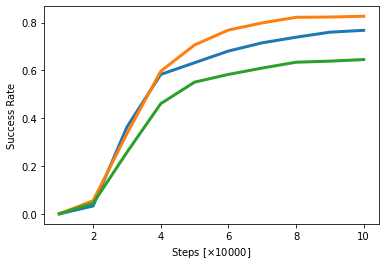

Benchmarks.SELF_DRIVING_CAR


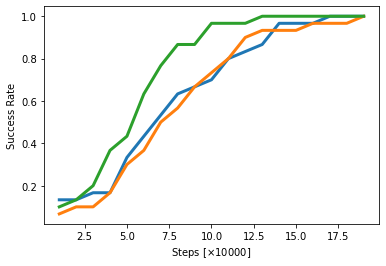

Benchmarks.SIDEWALK


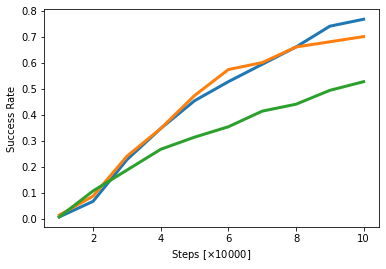

Benchmarks.TAXI


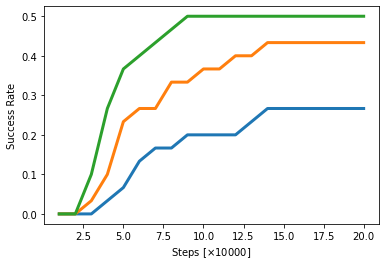

Benchmarks.WATER_TANK


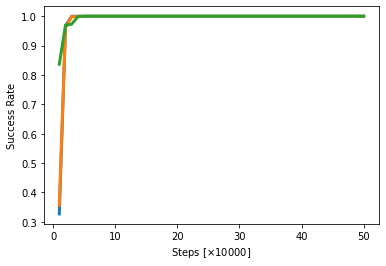

In [71]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'eval/best_success_rate', 'Steps', 'Success Rate')

Benchmarks.CAR_RACING


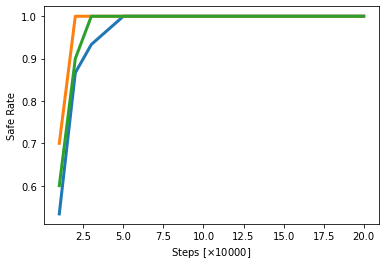

Benchmarks.CLIFFWALKING


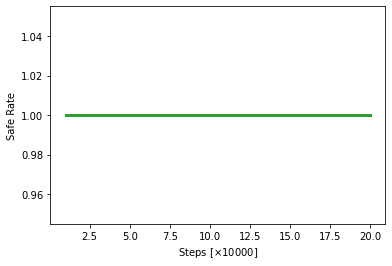

Benchmarks.GRID_WORLD


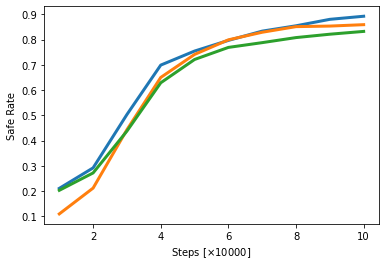

Benchmarks.SELF_DRIVING_CAR


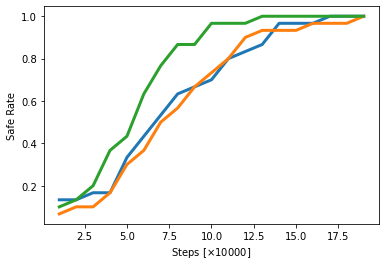

Benchmarks.SIDEWALK


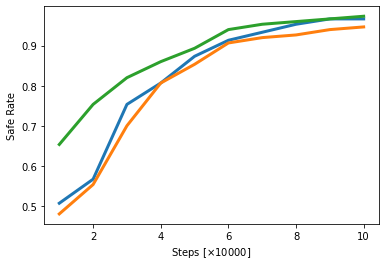

Benchmarks.TAXI


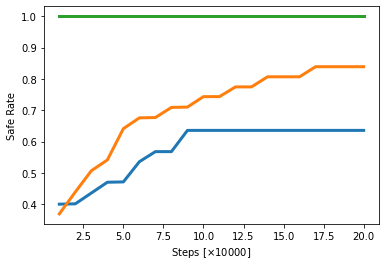

Benchmarks.WATER_TANK


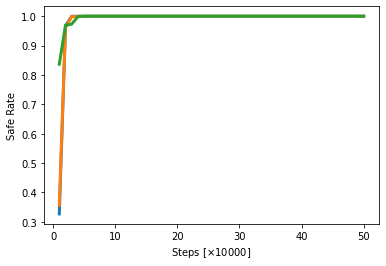

In [72]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'eval/best_safe_rate', 'Steps', 'Safe Rate')

Benchmarks.CAR_RACING


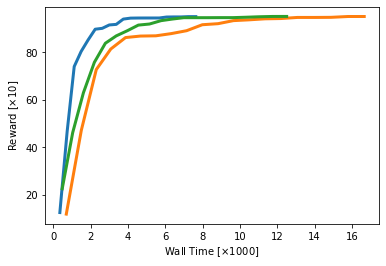

Benchmarks.CLIFFWALKING


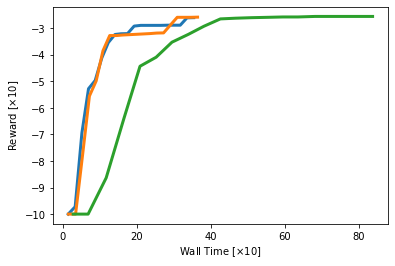

Benchmarks.GRID_WORLD


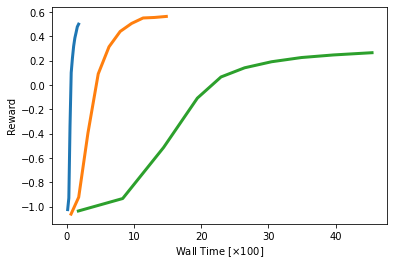

Benchmarks.SELF_DRIVING_CAR


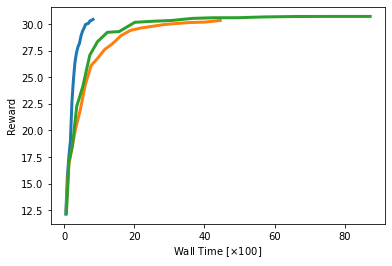

Benchmarks.SIDEWALK


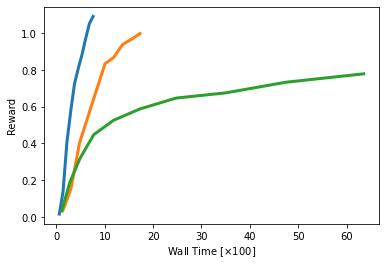

Benchmarks.TAXI


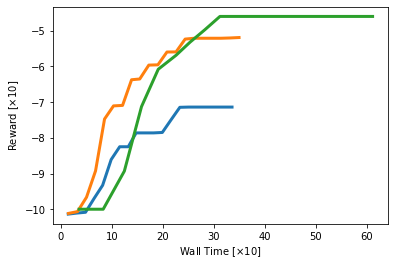

Benchmarks.WATER_TANK


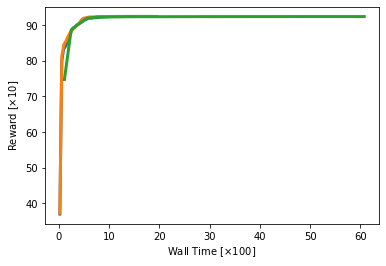

In [73]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'eval/wall_time', 'eval/best_mean_reward', 'Wall Time', 'Reward')

Benchmarks.CAR_RACING


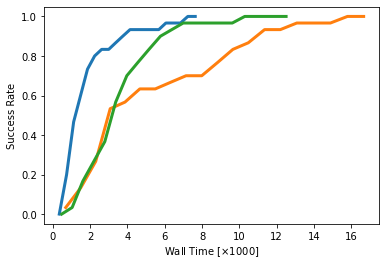

Benchmarks.CLIFFWALKING


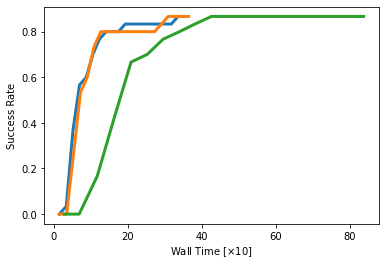

Benchmarks.GRID_WORLD


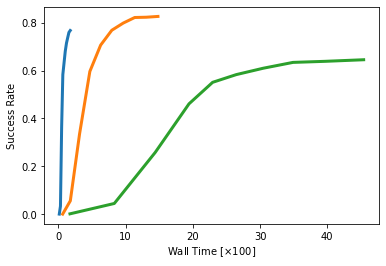

Benchmarks.SELF_DRIVING_CAR


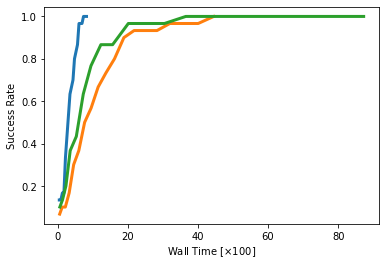

Benchmarks.SIDEWALK


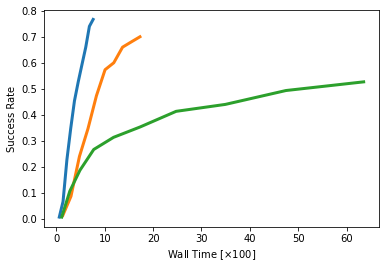

Benchmarks.TAXI


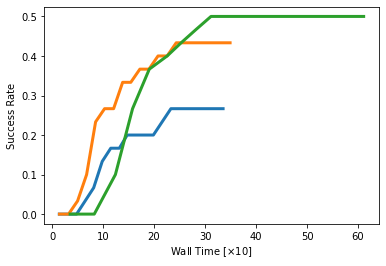

Benchmarks.WATER_TANK


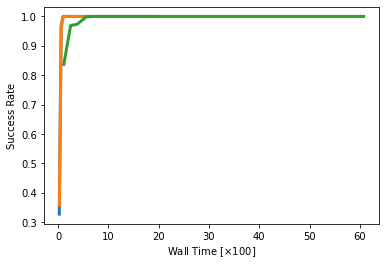

In [74]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'eval/wall_time', 'eval/best_success_rate', 'Wall Time', 'Success Rate')

Benchmarks.CAR_RACING


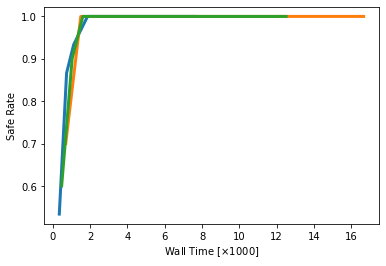

Benchmarks.CLIFFWALKING


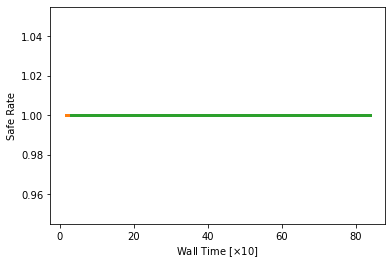

Benchmarks.GRID_WORLD


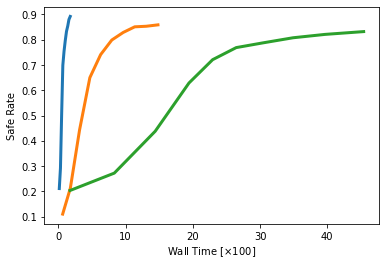

Benchmarks.SELF_DRIVING_CAR


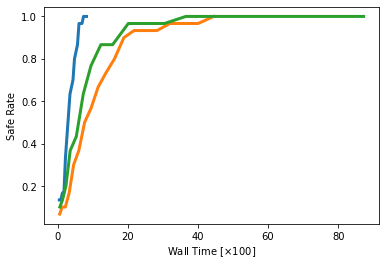

Benchmarks.SIDEWALK


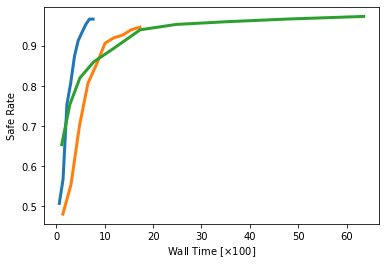

Benchmarks.TAXI


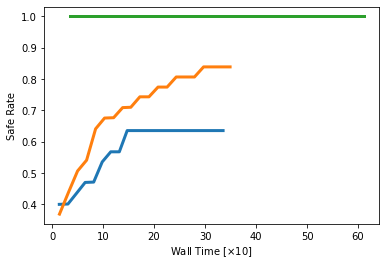

Benchmarks.WATER_TANK


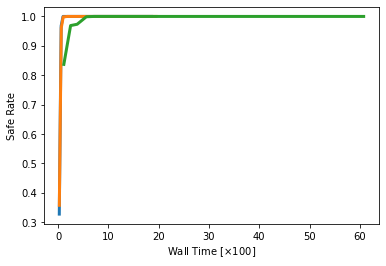

In [75]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'eval/wall_time', 'eval/best_safe_rate', 'Wall Time', 'Safe Rate')

Benchmarks.CAR_RACING


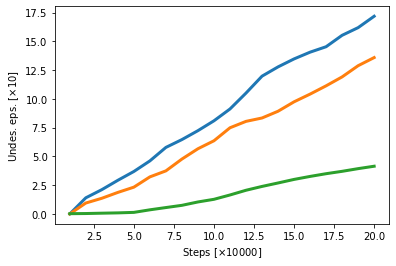

Benchmarks.CLIFFWALKING


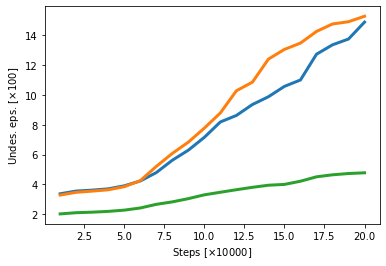

Benchmarks.GRID_WORLD


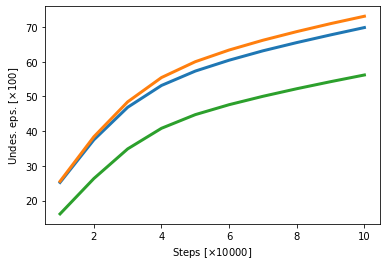

Benchmarks.SELF_DRIVING_CAR


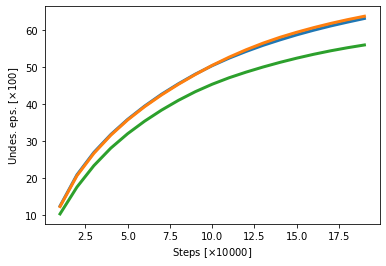

Benchmarks.SIDEWALK


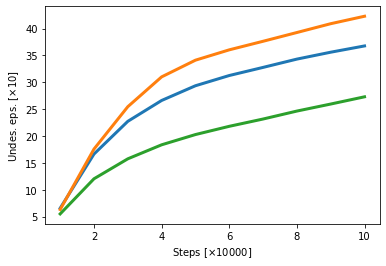

Benchmarks.TAXI


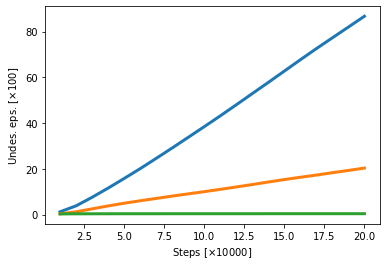

Benchmarks.WATER_TANK


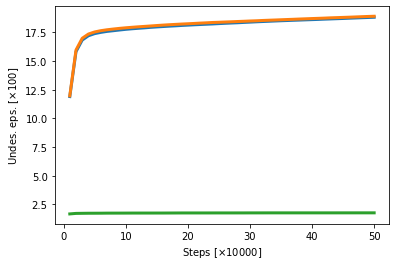

In [76]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'crash_episodes', 'Steps', 'Undes. eps.')

Benchmarks.CAR_RACING


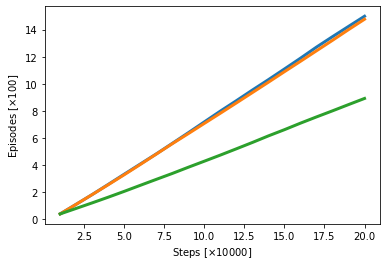

Benchmarks.CLIFFWALKING


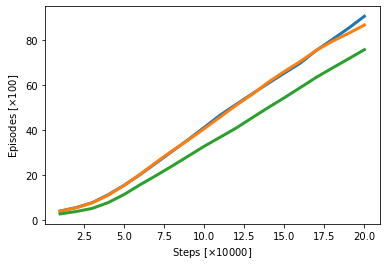

Benchmarks.GRID_WORLD


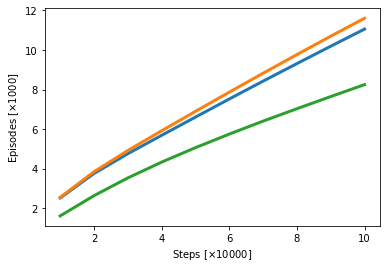

Benchmarks.SELF_DRIVING_CAR


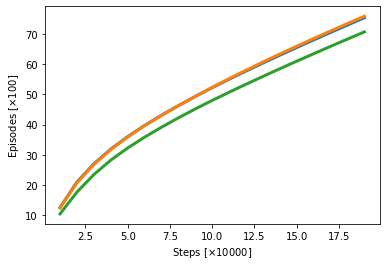

Benchmarks.SIDEWALK


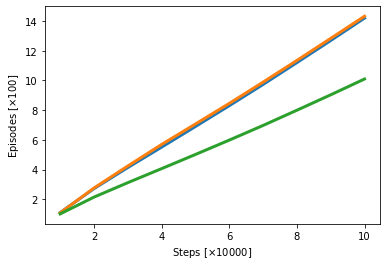

Benchmarks.TAXI


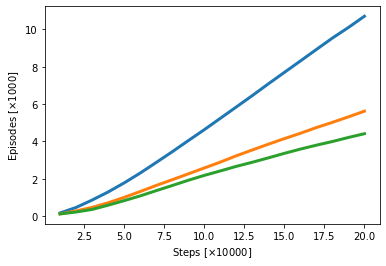

Benchmarks.WATER_TANK


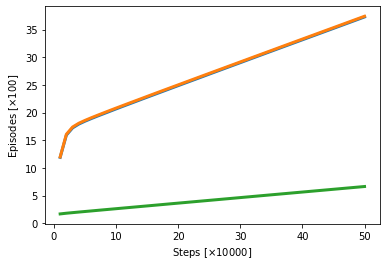

Benchmarks.CAR_RACING


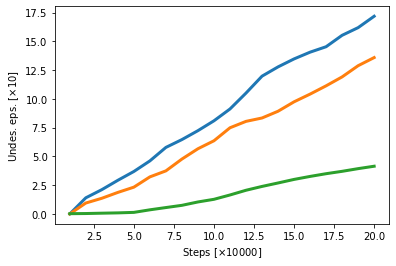

Benchmarks.CLIFFWALKING


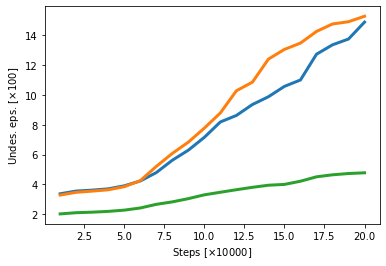

Benchmarks.GRID_WORLD


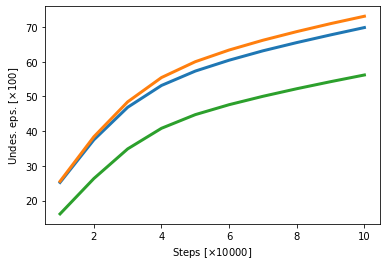

Benchmarks.SELF_DRIVING_CAR


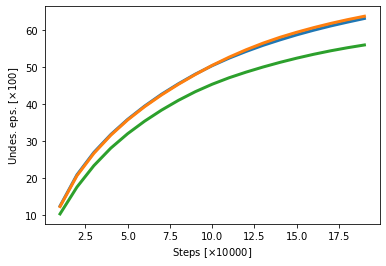

Benchmarks.SIDEWALK


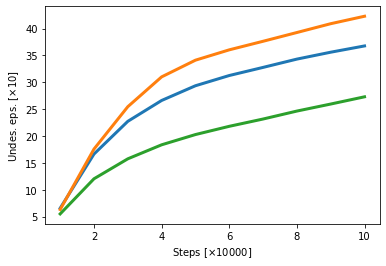

Benchmarks.TAXI


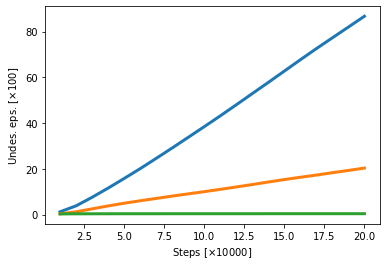

Benchmarks.WATER_TANK


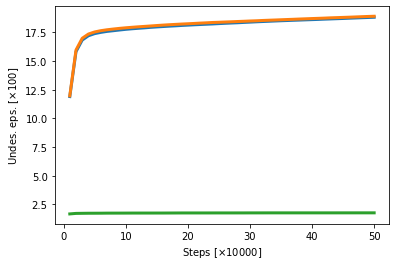

In [77]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'episodes', 'Steps', 'Episodes')


for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'steps', 'crash_episodes', 'Steps', 'Undes. eps.')

Benchmarks.CAR_RACING


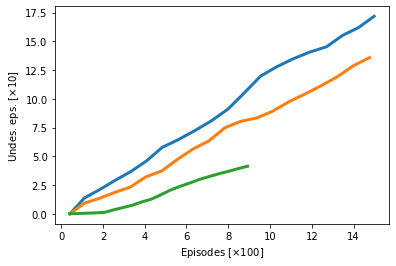

Benchmarks.CLIFFWALKING


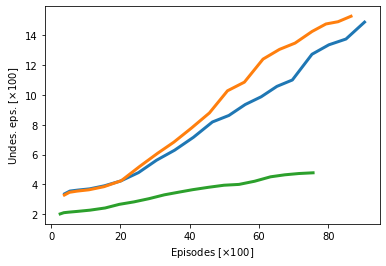

Benchmarks.GRID_WORLD


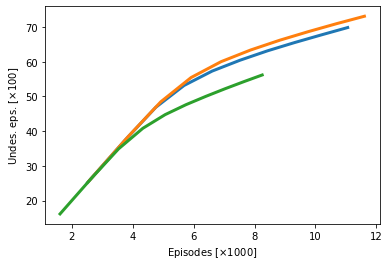

Benchmarks.SELF_DRIVING_CAR


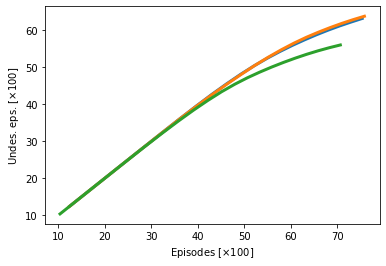

Benchmarks.SIDEWALK


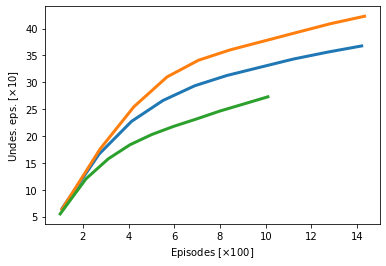

Benchmarks.TAXI


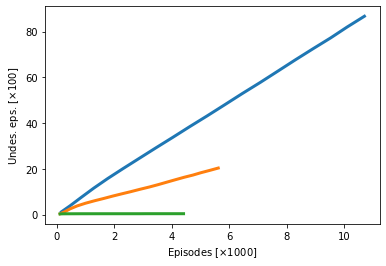

Benchmarks.WATER_TANK


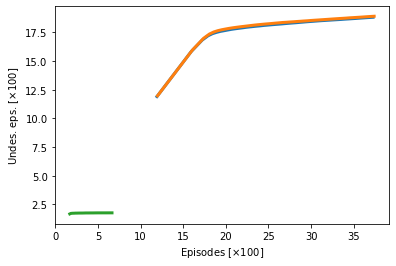

In [78]:
for benchmark in Benchmarks:
    print(benchmark)
    plot_eval_scalars(benchmark, 'episodes', 'crash_episodes', 'Episodes', 'Undes. eps.')


Here, we observe the reward

In [79]:
reward_frame = pd.DataFrame()
for benchmark in Benchmarks:
    for configuration in Configurations:
        reward_frame[benchmark, configuration] = list(
            map(lambda scalar: list(scalar['eval/mean_reward'])[-1], scalars[benchmark][configuration].values()))[-30:]


In [80]:
reward_frame

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
0,860.00,-91.11,682.22,-100.00,-100.00,-15.00,0.67,0.78,0.44,29.67,...,29.97,0.83,1.20,0.83,-102.00,-96.33,-100.00,920.23,905.63,923.48
1,-24.44,433.33,806.67,-100.00,-100.00,-100.00,0.75,0.50,0.54,30.61,...,30.88,0.00,0.93,1.38,-96.33,8.00,-100.00,919.40,923.87,918.65
2,242.22,922.00,860.00,-17.00,-17.00,-100.00,0.55,0.66,0.50,29.41,...,29.73,0.83,1.38,0.00,-101.00,-100.00,-100.00,918.68,923.85,923.65
3,82.22,910.80,55.56,-15.00,-15.00,-100.00,0.68,0.76,0.31,20.07,...,29.23,1.38,1.38,1.38,-102.00,-97.67,-100.00,923.75,923.75,922.95
4,28.89,184.44,557.78,-100.00,-17.00,-17.00,0.71,-1.02,0.06,18.29,...,29.65,1.02,0.00,0.00,-112.00,-103.67,-100.00,912.36,919.30,923.95
5,-91.11,882.22,851.11,-100.00,-100.00,-100.00,0.60,0.71,-0.68,29.49,...,30.21,1.38,1.20,0.37,-101.00,-104.00,-100.00,923.78,920.26,923.81
6,668.89,28.89,920.40,-15.00,-15.00,-100.00,0.70,0.45,0.49,28.97,...,29.94,1.38,0.65,0.00,-101.00,-101.00,4.00,920.53,923.78,917.39
7,-91.11,952.40,954.80,-100.00,-13.00,-100.00,-0.73,0.72,-1.02,30.77,...,29.57,0.90,0.00,1.20,-102.00,-103.00,-100.00,923.59,920.20,923.59
8,912.40,393.33,28.89,-15.00,-100.00,-100.00,0.52,0.65,-0.74,26.10,...,28.99,0.00,0.28,0.00,-102.00,8.00,-100.00,915.08,923.93,921.23
9,947.60,-91.11,420.00,-15.00,-100.00,-13.00,0.77,0.65,-0.96,30.05,...,30.00,0.99,0.19,0.54,-106.00,-901.00,-100.00,923.82,887.54,918.98


In [81]:
reward_frame.describe()

,"(Benchmarks.CAR_RACING, Configurations.NO_SHIELD)","(Benchmarks.CAR_RACING, Configurations.SAFE_PADDING)","(Benchmarks.CAR_RACING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.NO_SHIELD)","(Benchmarks.CLIFFWALKING, Configurations.SAFE_PADDING)","(Benchmarks.CLIFFWALKING, Configurations.DYNAMIC_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.NO_SHIELD)","(Benchmarks.GRID_WORLD, Configurations.SAFE_PADDING)","(Benchmarks.GRID_WORLD, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SELF_DRIVING_CAR, Configurations.NO_SHIELD)",...,"(Benchmarks.SELF_DRIVING_CAR, Configurations.DYNAMIC_SHIELD)","(Benchmarks.SIDEWALK, Configurations.NO_SHIELD)","(Benchmarks.SIDEWALK, Configurations.SAFE_PADDING)","(Benchmarks.SIDEWALK, Configurations.DYNAMIC_SHIELD)","(Benchmarks.TAXI, Configurations.NO_SHIELD)","(Benchmarks.TAXI, Configurations.SAFE_PADDING)","(Benchmarks.TAXI, Configurations.DYNAMIC_SHIELD)","(Benchmarks.WATER_TANK, Configurations.NO_SHIELD)","(Benchmarks.WATER_TANK, Configurations.SAFE_PADDING)","(Benchmarks.WATER_TANK, Configurations.DYNAMIC_SHIELD)"
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,375.53,509.25,622.07,-69.13,-66.00,-65.93,0.37,0.46,0.07,28.83,...,29.81,0.93,0.90,0.67,-147.61,-139.62,-92.93,918.89,919.81,921.81
std,419.98,450.89,346.90,41.93,42.36,42.44,0.55,0.54,0.59,3.04,...,0.55,0.44,0.50,0.54,222.32,224.60,26.90,9.50,8.15,3.46
min,-91.11,-313.91,-214.81,-109.00,-100.00,-100.00,-1.07,-1.21,-1.09,18.29,...,28.90,0.00,0.00,0.00,-1000.00,-1000.00,-100.00,885.90,887.54,907.09
25%,22.22,28.89,406.67,-100.00,-100.00,-100.00,0.42,0.53,-0.48,29.38,...,29.42,0.77,0.45,0.02,-102.00,-102.75,-100.00,918.84,919.45,920.66
50%,166.67,688.89,746.67,-100.00,-100.00,-100.00,0.58,0.64,0.30,29.71,...,29.74,0.96,1.11,0.74,-101.00,-101.00,-100.00,923.55,923.61,923.62
75%,857.78,916.20,905.30,-15.00,-15.00,-15.00,0.70,0.71,0.49,30.34,...,30.24,1.38,1.34,1.18,-101.00,-98.17,-100.00,923.72,923.75,923.70
max,954.40,955.20,954.80,-13.00,-13.00,-13.00,0.84,0.78,0.64,31.00,...,30.88,1.38,1.38,1.38,8.00,8.00,8.00,924.02,923.93,923.95


In [102]:
reward_mean_std_dict = dict()
for configuration in ConfigurationToLaTeX.keys():
    reward_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'] = []
    reward_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'] = []
    for benchmark in BenchmarkToLaTeX.keys():
        reward_mean_std_dict[ConfigurationToLaTeX[configuration], 'mean'].append(reward_frame[benchmark, configuration].describe()['mean'])
        reward_mean_std_dict[ConfigurationToLaTeX[configuration], 'std'].append(reward_frame[benchmark, configuration].describe()['std'])

reward_mean_std_frame = pd.DataFrame(reward_mean_std_dict, index=BenchmarkToLaTeX.values())
reward_mean_std_frame

\NoShield{}                       \
                                  mean                  std   
\WaterTank{}                    918.89                 9.50   
\GridWorld{}                      0.37                 0.55   
\CliffWalking{}                 -69.13                41.93   
\Taxi{}                        -147.61               222.32   
\SelfDrivingCar{}                28.83                 3.04   
\SideWalk{}                       0.93                 0.44   
\CarRacing{}                    375.53               419.98   

                        \SafePadding{}                       \
                                  mean                  std   
\WaterTank{}                    919.81                 8.15   
\GridWorld{}                      0.46                 0.54   
\CliffWalking{}                 -66.00                42.36   
\Taxi{}                        -139.62               224.60   
\SelfDrivingCar{}                28.86                 2.18   
\SideWalk{}                       0.90                 0.50   
\CarRacing{}                    509.25               450.89   

                   \DynamicShielding{}                       
                                  mean                  std  
\WaterTank{}                    921.81                 3.46  
\GridWorld{}                      0.07                 0.59  
\CliffWalking{}                 -65.93                42.44  
\Taxi{}                         -92.93                26.90  
\SelfDrivingCar{}                29.81                 0.55  
\SideWalk{}                       0.67                 0.54  
\CarRacing{}                    622.07               346.90

In [103]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             reward_mean_std_frame.to_latex(escape=False,
                                            column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{2}{c}{\NoShield{}} & \multicolumn{2}{c}{\SafePadding{}} & \multicolumn{2}{c}{\DynamicShielding{}} \\
{} & mean & std & mean & std & mean & std \\
\midrule
\WaterTank{} & 918.89 & 9.50 & 919.81 & 8.15 & 921.81 & 3.46 \\
\GridWorld{} & 0.37 & 0.55 & 0.46 & 0.54 & 0.07 & 0.59 \\
\CliffWalking{} & -69.13 & 41.93 & -66.00 & 42.36 & -65.93 & 42.44 \\
\Taxi{} & -147.61 & 222.32 & -139.62 & 224.60 & -92.93 & 26.90 \\
\SelfDrivingCar{} & 28.83 & 3.04 & 28.86 & 2.18 & 29.81 & 0.55 \\
\SideWalk{} & 0.93 & 0.44 & 0.90 & 0.50 & 0.67 & 0.54 \\
\CarRacing{} & 375.53 & 419.98 & 509.25 & 450.89 & 622.07 & 346.90 \\
\bottomrule
\end{tabular}



## 2022-04-11

The following shows the new tables and plots on 2022-04-11.

In [83]:
summary_dict = dict()
index_list = []

Frames = {
    '\# of crashes in training': crash_data_frame.describe(),
    'Mean reward of the result': reward_frame.describe(),
    #    'success rate': success_rate_frame.describe(),
    'Safe rate of the result': safe_rate_frame.describe(),
    'Total time [sec.]': wall_time_frame.describe(),
}

for configuration in ConfigurationToLaTeX.keys():
    for frame_name in Frames.keys():
        frame = Frames[frame_name]

        index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in BenchmarkToLaTeX.keys():
            if (ConfigurationToLaTeX[configuration], frame_name) not in summary_dict:
                summary_dict[ConfigurationToLaTeX[configuration], frame_name] = []
            summary_dict[ConfigurationToLaTeX[configuration], frame_name].append(
                frame[benchmark, configuration]['mean'])

mean_frame = pd.DataFrame(summary_dict, index=BenchmarkToLaTeX.values())
mean_frame

\NoShield{}                            \
                  \# of crashes in training Mean reward of the result   
\WaterTank{}                        1883.67                    918.89   
\GridWorld{}                        6996.40                      0.37   
\CliffWalking{}                     1493.20                    -69.13   
\Taxi{}                             8723.13                   -147.61   
\SelfDrivingCar{}                   6403.07                     28.83   
\SideWalk{}                          373.60                      0.93   
\CarRacing{}                         180.13                    375.53   

                                                                \
                  Safe rate of the result    Total time [sec.]   
\WaterTank{}                         1.00              1860.46   
\GridWorld{}                         0.80               177.18   
\CliffWalking{}                      1.00               355.18   
\Taxi{}                              0.57               336.04   
\SelfDrivingCar{}                    1.00               865.55   
\SideWalk{}                          0.93               762.67   
\CarRacing{}                         1.00              7650.38   

                             \SafePadding{}                            \
                  \# of crashes in training Mean reward of the result   
\WaterTank{}                        1892.40                    919.81   
\GridWorld{}                        7322.23                      0.46   
\CliffWalking{}                     1528.67                    -66.00   
\Taxi{}                             2057.33                   -139.62   
\SelfDrivingCar{}                   6454.60                     28.86   
\SideWalk{}                          427.93                      0.90   
\CarRacing{}                         141.17                    509.25   

                                                                \
                  Safe rate of the result    Total time [sec.]   
\WaterTank{}                         1.00              1947.09   
\GridWorld{}                         0.85              1487.10   
\CliffWalking{}                      1.00               365.54   
\Taxi{}                              0.67               349.78   
\SelfDrivingCar{}                    1.00              4919.13   
\SideWalk{}                          0.89              1734.66   
\CarRacing{}                         1.00             16694.63   

                        \DynamicShielding{}                            \
                  \# of crashes in training Mean reward of the result   
\WaterTank{}                         177.13                    921.81   
\GridWorld{}                        5623.43                      0.07   
\CliffWalking{}                      478.20                    -65.93   
\Taxi{}                               37.77                    -92.93   
\SelfDrivingCar{}                   5662.40                     29.81   
\SideWalk{}                          273.37                      0.67   
\CarRacing{}                          41.73                    622.07   

                                                                
                  Safe rate of the result    Total time [sec.]  
\WaterTank{}                         1.00              6080.89  
\GridWorld{}                         0.73              4548.70  
\CliffWalking{}                      1.00               839.06  
\Taxi{}                              1.00               611.87  
\SelfDrivingCar{}                    1.00             10087.18  
\SideWalk{}                          0.89              6395.73  
\CarRacing{}                         1.00             12532.04

In [84]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             mean_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{4}{c}{\NoShield{}} & \multicolumn{4}{c}{\SafePadding{}} & \multicolumn{4}{c}{\DynamicShielding{}} \\
{} & \# of crashes in training & Mean reward of the result & Safe rate of the result & Total time [sec.] & \# of crashes in training & Mean reward of the result & Safe rate of the result & Total time [sec.] & \# of crashes in training & Mean reward of the result & Safe rate of the result & Total time [sec.] \\
\midrule
\WaterTank{} & 1883.67 & 918.89 & 1.00 & 1860.46 & 1892.40 & 919.81 & 1.00 & 1947.09 & 177.13 & 921.81 & 1.00 & 6080.89 \\
\GridWorld{} & 6996.40 & 0.37 & 0.80 & 177.18 & 7322.23 & 0.46 & 0.85 & 1487.10 & 5623.43 & 0.07 & 0.73 & 4548.70 \\
\CliffWalking{} & 1493.20 & -69.13 & 1.00 & 355.18 & 1528.67 & -66.00 & 1.00 & 365.54 & 478.20 & -65.93 & 1.00 & 839.06 \\
\Taxi{} & 8723.13 & -147.61 & 0.57 & 336.04 & 2057.33 & -139.62 & 0.67 & 349.78 & 37.77 & -92.93 & 1.00 & 611.87 \\
\SelfDrivingCar{} & 6403.07 & 28.83 & 1.0

In [85]:
summary_dict = dict()
index_list = []

Frames = {
    '\# of crashes': crash_data_frame.describe(),
    #    'Mean reward of the result': reward_frame.describe(),
    #    'success rate': success_rate_frame.describe(),
    #    'Safe rate of the result': safe_rate_frame.describe(),
    'Total time [sec.]': wall_time_frame.describe(),
}

for configuration in ConfigurationToLaTeX.keys():
    for frame_name in Frames.keys():
        frame = Frames[frame_name]

        index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in BenchmarkToLaTeX.keys():
            if (ConfigurationToLaTeX[configuration], frame_name) not in summary_dict:
                summary_dict[ConfigurationToLaTeX[configuration], frame_name] = []
            summary_dict[ConfigurationToLaTeX[configuration], frame_name].append(
                frame[benchmark, configuration]['mean'])

mean_frame = pd.DataFrame(summary_dict, index=BenchmarkToLaTeX.values())
mean_frame

\NoShield{}                       \
                         \# of crashes    Total time [sec.]   
\WaterTank{}                   1883.67              1860.46   
\GridWorld{}                   6996.40               177.18   
\CliffWalking{}                1493.20               355.18   
\Taxi{}                        8723.13               336.04   
\SelfDrivingCar{}              6403.07               865.55   
\SideWalk{}                     373.60               762.67   
\CarRacing{}                    180.13              7650.38   

                        \SafePadding{}                       \
                         \# of crashes    Total time [sec.]   
\WaterTank{}                   1892.40              1947.09   
\GridWorld{}                   7322.23              1487.10   
\CliffWalking{}                1528.67               365.54   
\Taxi{}                        2057.33               349.78   
\SelfDrivingCar{}              6454.60              4919.13   
\SideWalk{}                     427.93              1734.66   
\CarRacing{}                    141.17             16694.63   

                   \DynamicShielding{}                       
                         \# of crashes    Total time [sec.]  
\WaterTank{}                    177.13              6080.89  
\GridWorld{}                   5623.43              4548.70  
\CliffWalking{}                 478.20               839.06  
\Taxi{}                          37.77               611.87  
\SelfDrivingCar{}              5662.40             10087.18  
\SideWalk{}                     273.37              6395.73  
\CarRacing{}                     41.73             12532.04

In [86]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             mean_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))

\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{2}{c}{\NoShield{}} & \multicolumn{2}{c}{\SafePadding{}} & \multicolumn{2}{c}{\DynamicShielding{}} \\
{} & \# of crashes & Total time [sec.] & \# of crashes & Total time [sec.] & \# of crashes & Total time [sec.] \\
\midrule
\WaterTank{} & 1883.67 & 1860.46 & 1892.40 & 1947.09 & 177.13 & 6080.89 \\
\GridWorld{} & 6996.40 & 177.18 & 7322.23 & 1487.10 & 5623.43 & 4548.70 \\
\CliffWalking{} & 1493.20 & 355.18 & 1528.67 & 365.54 & 478.20 & 839.06 \\
\Taxi{} & 8723.13 & 336.04 & 2057.33 & 349.78 & 37.77 & 611.87 \\
\SelfDrivingCar{} & 6403.07 & 865.55 & 6454.60 & 4919.13 & 5662.40 & 10087.18 \\
\SideWalk{} & 373.60 & 762.67 & 427.93 & 1734.66 & 273.37 & 6395.73 \\
\CarRacing{} & 180.13 & 7650.38 & 141.17 & 16694.63 & 41.73 & 12532.04 \\
\bottomrule
\end{tabular}



In [87]:
summary_dict = dict()
index_list = []

Frames = {
    #    '\# of crashes in training': crash_data_frame.describe(),
    'Mean reward': reward_frame.describe(),
    'Success rate': success_rate_frame.describe(),
    'Safe rate': safe_rate_frame.describe(),
    #    'Total time [sec.]': wall_time_frame.describe(),
}

for configuration in ConfigurationToLaTeX.keys():
    for frame_name in Frames.keys():
        frame = Frames[frame_name]

        index_list.append(f'{frame_name} / {configuration_name[configuration]}')
        for benchmark in BenchmarkToLaTeX.keys():
            if (ConfigurationToLaTeX[configuration], frame_name) not in summary_dict:
                summary_dict[ConfigurationToLaTeX[configuration], frame_name] = []
            summary_dict[ConfigurationToLaTeX[configuration], frame_name].append(
                frame[benchmark, configuration]['mean'])

mean_frame = pd.DataFrame(summary_dict, index=BenchmarkToLaTeX.values())
mean_frame

\NoShield{}                       \
                           Mean reward         Success rate   
\WaterTank{}                    918.89                 1.00   
\GridWorld{}                      0.37                 0.77   
\CliffWalking{}                 -69.13                 0.87   
\Taxi{}                        -147.61                 0.27   
\SelfDrivingCar{}                28.83                 1.00   
\SideWalk{}                       0.93                 0.77   
\CarRacing{}                    375.53                 1.00   

                                             \SafePadding{}  \
                             Safe rate          Mean reward   
\WaterTank{}                      1.00               919.81   
\GridWorld{}                      0.80                 0.46   
\CliffWalking{}                   1.00               -66.00   
\Taxi{}                           0.57              -139.62   
\SelfDrivingCar{}                 1.00                28.86   
\SideWalk{}                       0.93                 0.90   
\CarRacing{}                      1.00               509.25   

                                                             \
                          Success rate            Safe rate   
\WaterTank{}                      1.00                 1.00   
\GridWorld{}                      0.83                 0.85   
\CliffWalking{}                   0.87                 1.00   
\Taxi{}                           0.43                 0.67   
\SelfDrivingCar{}                 1.00                 1.00   
\SideWalk{}                       0.70                 0.89   
\CarRacing{}                      1.00                 1.00   

                   \DynamicShielding{}                       \
                           Mean reward         Success rate   
\WaterTank{}                    921.81                 1.00   
\GridWorld{}                      0.07                 0.65   
\CliffWalking{}                 -65.93                 0.87   
\Taxi{}                         -92.93                 0.50   
\SelfDrivingCar{}                29.81                 1.00   
\SideWalk{}                       0.67                 0.53   
\CarRacing{}                    622.07                 1.00   

                                        
                             Safe rate  
\WaterTank{}                      1.00  
\GridWorld{}                      0.73  
\CliffWalking{}                   1.00  
\Taxi{}                           1.00  
\SelfDrivingCar{}                 1.00  
\SideWalk{}                       0.89  
\CarRacing{}                      1.00

In [88]:
import re

pd.options.display.float_format = '{:20.2f}'.format
print(re.sub(r' +', ' ',
             mean_frame.to_latex(escape=False, column_format='lcccccccccccc', multicolumn_format='c', multirow=True)))



\begin{tabular}{lcccccccccccc}
\toprule
{} & \multicolumn{3}{c}{\NoShield{}} & \multicolumn{3}{c}{\SafePadding{}} & \multicolumn{3}{c}{\DynamicShielding{}} \\
{} & Mean reward & Success rate & Safe rate & Mean reward & Success rate & Safe rate & Mean reward & Success rate & Safe rate \\
\midrule
\WaterTank{} & 918.89 & 1.00 & 1.00 & 919.81 & 1.00 & 1.00 & 921.81 & 1.00 & 1.00 \\
\GridWorld{} & 0.37 & 0.77 & 0.80 & 0.46 & 0.83 & 0.85 & 0.07 & 0.65 & 0.73 \\
\CliffWalking{} & -69.13 & 0.87 & 1.00 & -66.00 & 0.87 & 1.00 & -65.93 & 0.87 & 1.00 \\
\Taxi{} & -147.61 & 0.27 & 0.57 & -139.62 & 0.43 & 0.67 & -92.93 & 0.50 & 1.00 \\
\SelfDrivingCar{} & 28.83 & 1.00 & 1.00 & 28.86 & 1.00 & 1.00 & 29.81 & 1.00 & 1.00 \\
\SideWalk{} & 0.93 & 0.77 & 0.93 & 0.90 & 0.70 & 0.89 & 0.67 & 0.53 & 0.89 \\
\CarRacing{} & 375.53 & 1.00 & 1.00 & 509.25 & 1.00 & 1.00 & 622.07 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}

